# **Outils utilisés dans le projet**

## **PySpark**  
**PySpark** est l'interface Python d'**Apache Spark** un framework open-source dédié au traitement distribué de données massives. Il permet d'effectuer des **calculs parallèles** sur un cluster de machines, offrant ainsi des performances optimisées pour le traitement de **grands volumes de données**.


### **Objectifs**
- Manipuler et analyser des données avec **Spark SQL** et les **DataFrames**.  
- Appliquer des algorithmes de machine learning via **MLlib**.  

---

## **Spark NLP**  
Bibliothèque NLP basée sur Spark, optimisée pour les pipelines scalables et le traitement parallèle.  

### **Objectifs**
- Prétraiter et analyser des textes (tokenisation, lemmatisation, annotation).  
- Construire des pipelines NLP performants.  
- Exploiter des modèles pré-entraînés.  

---

### **Installation**

- [Documentation officielle de Spark NLP - Guide de démarrage](https://sparknlp.org/api/python/getting_started/index.html)  
- [Spark NLP sur PyPI](https://pypi.org/project/spark-nlp/)  

#### **Configuration**
- Python 3.7.x, Java 8, PySpark 3.3.1, Spark NLP 5.5.1  



# Installation de librairies pour ce projet

In [1]:
pip install rake-nltk sumy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.2 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 27.0 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=c356aededd95fb3ef89a0f9c0b0c82c81e4d4461825fa19df91cbcaa925d96be
  Stored in directory: /home/jovyan/.cache/pip/wheels/ba/9f/70/7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=7da1281bfe81f831dfc51809f7d452617429b842c097d82d4027c37beba07553
  Stored in directory: /home/jovyan/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built breadability docopt
Note: you may need to restart the kernel to use updated packages.


# **Import des librairies**

In [3]:
import os

import numpy as np
# Corriger la compatibilité avec NumPy récent
np.bool = np.bool_

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from IPython.display import display, HTML


import pyspark
import sparknlp

from pyspark.sql import functions as F
from pyspark.sql import DataFrame
from pyspark.sql.functions import size, split, explode, col, countDistinct, array_remove  # Importez toutes les fonctions nécessaires
from pyspark.sql.functions import monotonically_increasing_id

from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.annotator import WordEmbeddingsModel, SentenceEmbeddings   ## word2vec, bert

from pyspark.ml import Pipeline
from pyspark.ml.functions import vector_to_array


from pyspark.ml.feature import CountVectorizer, IDF, StringIndexer, PCA

from pyspark.ml.evaluation import ClusteringEvaluator  
from pyspark.ml.clustering import KMeans


# Vérifier la version de PySpark
print("PySpark version:", pyspark.__version__)

# Vérifier la version de Spark NLP
print("Spark NLP version:", sparknlp.version())

PySpark version: 3.3.1
Spark NLP version: 5.5.1


## **Démarrer une session Spark NLP**

In [4]:
# Définir les variables d'environnement nécessaires
os.environ["JAVA_HOME"] = "/srv/conda/envs/myenv/jre"  # Chemin vers Java
os.environ['PYSPARK_PYTHON'] = '/srv/conda/envs/notebook/bin/python3.7'  # Interpréteur Python pour les workers
os.environ['PYSPARK_DRIVER_PYTHON'] = '/srv/conda/envs/notebook/bin/python3.7'  # Interpréteur Python pour le driver

# Démarrer Spark NLP configurée
spark = sparknlp.start()


:: loading settings :: url = jar:file:/srv/conda/envs/notebook/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/jovyan/.ivy2/cache
The jars for the packages stored in: /home/jovyan/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-5cf48c9f-3f0f-4262-be4d-7755e3911b28;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.5.1 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.12.500 in centra

25/01/27 20:51:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### **À propos des JARs**  
Après l'exécution de **Spark NLP**, on observe le téléchargement et l'ajout de plusieurs **JARs** nécessaires à son fonctionnement. Parmi eux, le JAR principal :  

- **`com.johnsnowlabs.nlp:spark-nlp_2.12:5.5.1`**  
   Ce JAR permet d'accéder aux fonctionnalités de traitement avancé du langage naturel (NLP) dans un environnement **distribué** avec Apache Spark.  

Ces JARs sont automatiquement gérés par **`sparknlp.start()`**, simplifiant leur intégration sans intervention manuelle.

# **Importation des données**

- **`constructions_metropole_idéeparis.csv`** : données textuelles pour construire le modèle NLP.  
- **`french.txt`** : liste de mots français courants utilisée pour enrichir les stopwords et réduire le bruit dans les données.


In [5]:
###  nous allons importer un fichier txt des mots français les plus commun (adjectif, pronom, nom...)
### but supprimer un maximum de mots

french_text = spark.read.csv("french.txt")

french_text= french_text.withColumnRenamed("_c0","mots_french")
french_text.show(n=5)

+-----------+
|mots_french|
+-----------+
|          a|
|         ai|
|        aie|
|      aient|
|       aies|
+-----------+
only showing top 5 rows



In [6]:
# Importation du fichier CSV avec PySpark

# option("header", "true")       : S'assurer que la première ligne contient les noms des colonnes
# option("inferSchema", "true")  : Détection automatique des types de données
# option("multiLine", "true")    :  Gérer les lignes multi-lignes

data = spark.read.option("sep", ";") \
                 .option("header", True)  \
                 .option("inferSchema", True)  \
                 .option("multiLine", True) \
                 .csv("construisons-la-metropole-du-grand-paris-ideeparis.csv")



# verification d'un dataframe
print(type(data))

## voir le nombre de lignes et de colonnes
print( data.count(), len(data.columns) )

## Obtenir les noms des colonnes
column_names = data.columns
print(column_names)


<class 'pyspark.sql.dataframe.DataFrame'>
362 21
['Identifiant', 'URL', 'date de publication', 'Campagne', 'thématique', 'titre', 'Objectif', 'description', 'localisation', 'lieu précis', 'contributeur', 'type de contributeur', 'pseudo', 'Situation actuelle - diagnostic', 'Expérience précédente', 'Site internet', 'Date de mise à jour', 'nombre de likes', 'nombre de commentaires', 'fichier attaché', 'Image']


### **Variables principales conservées :**  
- **`description`** : Texte descriptif détaillé, principal support pour l'analyse NLP.  
- **`thématique`** : Catégorie générale à laquelle appartient chaque idée, servant de base pour la classification ou la validation.

In [7]:
# Nous créer un nouveau data contenant que les 3 variables 
data_3v= data.select('Identifiant','thématique', 'description')

# Cela permet de vérifier la structure du DataFrame
print( data_3v.printSchema() )

# Affiche le type de l'objet 
print( type(data_3v) )

# on affiche le data`truncate=True` limite la largeur des colonnes affichées.
data_3v.show(n=4, truncate=True)

# truncate=False, cela signifie que les colonnes ne seront pas tronquéeset que leur contenu sera affiché en entier, 
# quelle que soit leur longueur.
data_3v.select("thématique","description").show(n=2, truncate=False)

root
 |-- Identifiant: double (nullable = true)
 |-- thématique: string (nullable = true)
 |-- description: string (nullable = true)

None
<class 'pyspark.sql.dataframe.DataFrame'>
+-----------+--------------------+--------------------+
|Identifiant|          thématique|         description|
+-----------+--------------------+--------------------+
|     5635.0|Transition écolog...|Le Canal Saint-Ma...|
|     6298.0|         Rayonnement|L'est du 18eme, q...|
|     5609.0|Transition écolog...|Pour tout projet ...|
|     5617.0|Transition écolog...|Pousser les gens ...|
+-----------+--------------------+--------------------+
only showing top 4 rows

+----------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Pour une visualisation** rapide des données, nous utilisons la méthode `data.show()` de PySpark, qui affiche les données sous forme de tableau ASCII directement dans la console. Cependant, pour un affichage plus élégant et manipulable, nous convertissons le DataFrame PySpark en DataFrame Pandas avec `toPandas()`. 


In [8]:
# Conversion en DataFrame Pandas
pandas_df = data_3v.limit(5).toPandas()  # Limiter à 5 lignes 

# Désactiver la troncature pour afficher tout le texte
pd.set_option('display.max_colwidth', None)

# Affichage avec Pandas
pandas_df

,Identifiant,thématique,description
0,5635.0,Transition écologique et Mobilités,"Le Canal Saint-Martin est déjà l'un des espaces publics les plus convoités de Paris. Poursuivons vers l'amont en transformant le canal de l'Ourcq et le canal Saint-Denis, pour en faire les Champs-Elysées du 21ème siècle : limitation de la place de la voiture, continuité piétonne jusqu'à la Seine et à Bondy, ouverture de terrasses, création de franchissements innovants, activités sur l'eau, installation d'équipements emblématiques... Tous les territoires traversés sont en pleine mutation, et pourraient être irrigués par cet espace public majeur, plutôt que de percevoir le canal comme une coupure."
1,6298.0,Rayonnement,"L'est du 18eme, quartiers de la Chapelle et Pajol bien que très agréable pour son meltingpot reste très éloigné de l'image de Paris. L'aménagement de place (place Hébert, place de la Chapelle) des voix de circulations ainsi que plus de caméras permettrait de rendre ce quartier plus parisien et moins ghetto qu'il ne peux l'être. J'habite ce quartier et je l'adore mais il n'a rien de sûr et qui donne envie de s'y balader (touristes, parisiens et autres...)"
2,5609.0,Transition écologique et Mobilités,"Pour tout projet de construction ou rénovation, rendre systématique la réalisation d'une étude sur l'opportunité de vegetaliser les toits et murs, ainsi que sur l'opportunité de production d'énergie propre (solaire, petit éolien, ...). Le résultat de l'étude étant non contraignant, mais cherche a déclencher une réflexion."
3,5617.0,Transition écologique et Mobilités,"Pousser les gens à faire du vélo c'est bien mais 2 problèmes de stationnement se posent aujourd'hui: 1. Pas assez d'emplacements réservés aux vélos des particuliers dans la rue. 2. Beaucoup de syndic d'immeubles refusent que l'on gare le vélo dans la cour d'immeuble par soucis d'esthétisme. Je suis pour qu'on oblige les syndic de copro/immeubles à accepter que les locataires garent leur vélo dans la cour à des emplacements précis, voire qu'on les oblige à construire un local à vélo si la surface de la cour le permet. Garer son vélo dans la rue est parfois synonyme de vol et/ou de dégradation. Merci."
4,5756.0,Lutte contre les inégalités,"""Les pistes cyclables, sont utilisées de plus en plus par d'autres moyens que les vélos comme déplacement """"doux"""", tels que les rollers, les longboard, les skateboards et les trottinettes. Nous proposons un changement de nom et de logo pour éviter les conflits entre utilisateurs, de cet espace de déplacements de plus en plus utilisé par des pratiquants de la glisse urbaine."""


# **Exploration du texte** 

- **Comprendre la structure et les caractéristiques des données textuelles :**
     - Comprendre leur composition (tailles, catégories, fréquences des mots).
     - Identifier des tendances ou des anomalies.

In [9]:

######################################################"
########" Tokenisation des Mots et Phrases ##########
#####################################################

# Etape 1 : Tokenisation, créer une colonne 'words' qui contient la liste des mots
tokenized_data = data_3v.withColumn("words", split(col("description"), r"\s+"))     # espaces comme délimiteurs

# Etape 2 : Compter le nombre de mots dans la colonne 'words' et créer une nouvelle colonne 'word_count'
tokenized_data= tokenized_data.withColumn("word_count", F.size(col("words")))

# Etape 3 : Ajouter une colonne pour le nombre de phrases
tokenized_data= tokenized_data.withColumn("sentence_count", 
                             size(split(col("description"), r"[.!?]"))  # Diviser par ., ! ou ?
)


###################################################################
## Calcul du Nombre Total de Phrases et de Mots dans un DataFrame
###################################################################

total_phrases = tokenized_data.agg(F.sum("sentence_count")).collect()[0][0]
total_mots = tokenized_data.agg(F.sum("word_count")).collect()[0][0]

###########################################################################
## Calcul du Nombre d'Occurrences et de Mots Uniques dans une Colonne de Mots
###########################################################################

# Exploser la colonne 'words' pour obtenir une ligne par mot
exploded_data = tokenized_data.withColumn("word", explode(col("words")))

# Grouper par mot et compter le nombre d'occurrences
word_counts = exploded_data.groupBy("word").count()

# Compter le nombre de mots uniques
unique_word_count = word_counts.count()


#############################
######## Affichage ######### 
###############################

# Resultat
tokenized_data.show(n=3, truncate=True)

# Afficher le nombre total de mots
print(f"Le nombre total de phrases est : {total_phrases}")

# Afficher le nombre total de mots
print(f"Le nombre total de mots est : {total_mots}")

print(f"Nombre de mots uniques : {unique_word_count}")



+-----------+--------------------+--------------------+--------------------+----------+--------------+
|Identifiant|          thématique|         description|               words|word_count|sentence_count|
+-----------+--------------------+--------------------+--------------------+----------+--------------+
|     5635.0|Transition écolog...|Le Canal Saint-Ma...|[Le, Canal, Saint...|        90|             6|
|     6298.0|         Rayonnement|L'est du 18eme, q...|[L'est, du, 18eme...|        78|             6|
|     5609.0|Transition écolog...|Pour tout projet ...|[Pour, tout, proj...|        46|             6|
+-----------+--------------------+--------------------+--------------------+----------+--------------+
only showing top 3 rows

Le nombre total de phrases est : 2765
Le nombre total de mots est : 49085
Nombre de mots uniques : 11366


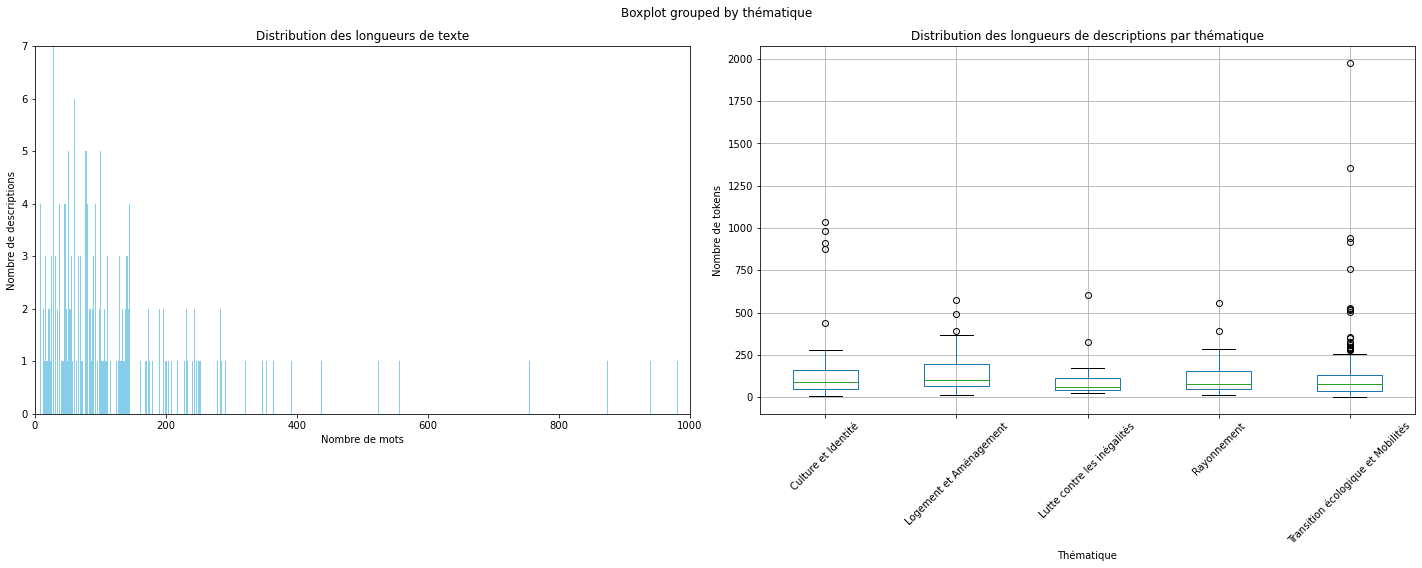

Statistiques descriptives des mots par thématique
+----------------------------------+--------+---------+---------+------------------+------------------+
|thématique                        |num_docs|min_words|max_words|avg_words         |stddev_words      |
+----------------------------------+--------+---------+---------+------------------+------------------+
|Transition écologique et Mobilités|185     |1        |1976     |134.46486486486486|214.81670677303748|
|Culture et Identité               |70      |9        |1034     |153.55714285714285|212.75846247338146|
|Logement et Aménagement           |47      |14       |573      |145.51063829787233|121.49035967130057|
|Rayonnement                       |36      |14       |557      |113.58333333333333|111.25475912773992|
|Lutte contre les inégalités       |24      |22       |602      |105.5             |124.79478807400083|
+----------------------------------+--------+---------+---------+------------------+------------------+

Identificatio

identifiant,thématique,word_count
5759.0,Transition écologique et Mobilités,1976
6643.0,Transition écologique et Mobilités,1356
6016.0,Culture et Identité,1034
5743.0,Culture et Identité,981
5915.0,Transition écologique et Mobilités,940
6386.0,Transition écologique et Mobilités,919
6507.0,Culture et Identité,912
5804.0,Culture et Identité,874
6671.0,Transition écologique et Mobilités,755
6420.0,Lutte contre les inégalités,602


word,count
de,2860
et,1364
la,1297
les,1288
des,1220
à,901
le,787
en,703
pour,570
du,523


In [10]:

# Création de la figure avec 2 subplots (côte à côte)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 ligne, 2 colonnes

###########################################################################
# Graphique 1 : Distribution du nombre de mots dans les descriptions
###########################################################################

word_count_distribution = tokenized_data.groupBy("word_count").count().orderBy("word_count")

# Convertir le DataFrame PySpark en DataFrame Pandas
word_count_distribution_pd = word_count_distribution.toPandas()

# Créer le graphique avec matplotlib
axes[0].bar(word_count_distribution_pd['word_count'], word_count_distribution_pd['count'], color='skyblue')
axes[0].set_xlim(0, 1000)  # Définir les limites de l'axe des x de 0 à 1000
axes[0].set_ylim(0, 7)  # Définir les limites de l'axe des y de 0 à 7
axes[0].set_xlabel('Nombre de mots')          # xlabel représente word_count
axes[0].set_ylabel('Nombre de descriptions')  # ylabel représente count
axes[0].set_title('Distribution des longueurs de texte')


###########################################################################
# Graphique 2 : Boxplot des longueurs de descriptions par thématique
###########################################################################

# Récupération des longueurs des textes par label
length_data = tokenized_data.select("thématique", "word_count").toPandas()

# Création d'un boxplot
length_data.boxplot(column="word_count", by="thématique", ax=axes[1])

# Rotater les étiquettes de l'axe des x pour éviter le chevauchement
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

axes[1].set_title("Distribution des longueurs de descriptions par thématique")
axes[1].set_xlabel("Thématique")
axes[1].set_ylabel("Nombre de tokens")

plt.tight_layout()  # Ajuster automatiquement les sous-tracés pour un bon espacement
plt.show()


##############################################
## *Statistiques des mots par thématique**
############################################

mots_thématiques = tokenized_data.groupBy("thématique").agg(
    F.count("*").alias("num_docs"),
    F.min("word_count").alias("min_words"),
    F.max("word_count").alias("max_words"),
    F.avg("word_count").alias("avg_words"),
    F.stddev("word_count").alias("stddev_words")
    
).orderBy(F.desc("num_docs"))


print("Statistiques descriptives des mots par thématique")
mots_thématiques.show(truncate=False)



#############################################
#### **Identification des textes extrêmes**
############################################

print("Identification des textes extrêmes")

# Sélectionner les colonnes nécessaires
selected_data = tokenized_data.select("identifiant", "thématique", "word_count")

# Trier les données par word_count de manière décroissante
decr = selected_data.orderBy(F.col("word_count").desc())

# Trier les données par word_count de manière croissante
croi = selected_data.orderBy(F.col("word_count"))

# Convertir les DataFrames PySpark en DataFrames Pandas
decr_pd = decr.limit(10).toPandas()
croi_pd = croi.limit(10).toPandas()

# Afficher les tableaux côte à côte
html_decr = decr_pd.to_html(index=False)
html_croi = croi_pd.to_html(index=False)

display(HTML(f"""
<div style="display:flex;">
    <div style="margin-right:20px;">
        <h3>10 plus gros textes</h3>
        {html_decr}
    </div>
    <div>
        <h3>10 plus petits textes</h3>
        {html_croi}
    </div>
</div>
"""))


####################################################
############ Identenfication des tendance #########
####################################################

#######################
# a) Fréquences des mots
########################

# Diviser les descriptions en mots
words = tokenized_data.withColumn("word", explode(col("words")))

# Compter les occurrences de chaque mot
word_frequencies = words.groupBy("word").count().orderBy(F.desc("count"))

# Convertir le DataFrame PySpark en DataFrame Pandas
word_frequencies_pd = word_frequencies.limit(20).toPandas()

#####################################
# b) Fréquences par catégories (thématiques)
#########################################

# Compter les occurrences de chaque mot par thématique
category_word_frequencies = words.groupBy("thématique", "word").count().orderBy(F.desc("count"))

# Convertir le DataFrame PySpark en DataFrame Pandas
category_word_frequencies_pd = category_word_frequencies.limit(20).toPandas()

# c) Convertir les DataFrames Pandas en HTML
html_word_frequencies = word_frequencies_pd.to_html(index=False)
html_category_word_frequencies = category_word_frequencies_pd.to_html(index=False)

# Afficher les tableaux côte à côte
display(HTML(f"""
<div style="display:flex;">
    <div style="margin-right:20px;">
        <h3>Fréquences des mots</h3>
        {html_word_frequencies}
    </div>
    <div>
        <h3>Fréquences par catégories (thématiques)</h3>
        {html_category_word_frequencies}
    </div>
</div>
"""))



### **Commentaires sur les résultats de l’analyse exploratoire**

1. **Distribution des mots :**  
   - Corpus : **49 053 mots** (dont **11 376 uniques**) → diversité lexicale modérée.  
   - Longueur des documents : de **1 à 1 976 mots**, majorité entre **1 et 170 mots** → textes courts prédominants.  
   - Forte présence de **stopwords** → nécessite un nettoyage pour améliorer l’analyse.  

2. **Analyse thématique :**  
   - **Transition écologique et Mobilités** :  
     - **185 documents**, longueur moyenne : **134 mots** (écart-type : **214 mots**) → grande variation textuelle.  
   - **Culture et Identité** :  
     - **70 documents**, longueur moyenne : **153 mots**, écart-type similaire (**212 mots**) → diversité comparable.  
   - **Logement et Aménagement** :  
     - **47 documents**, longueur moyenne : **145 mots** (écart-type : **121 mots**) → cohérence textuelle plus marquée. 
     
-----------

### Plan d'action suite a notre premiere analyse 

- **Suppression des mots contenant moins de 8 mots et plus de 1000 mots**
- **Enrichir une liste stopwords à supprimer**

In [11]:
# Afficher le nombre de lignes avant suppression
print("Nombre de lignes avant suppression :", data_3v.count())

# Filtrer les documents avec un nombre de mots <= 8 ou > 1000
filtered_ids = tokenized_data.filter(
    (tokenized_data["word_count"] <= 8) | (tokenized_data["word_count"] > 1000)
).select("Identifiant")

# Supprimer les documents filtrés de `data_3v` en utilisant une jointure anti
data_3v_cleaned = data_3v.join(filtered_ids, on="Identifiant", how="left_anti")

# Afficher le nombre de lignes après suppression
print("Nombre de lignes après suppression :", data_3v_cleaned.count())

Nombre de lignes avant suppression : 362
Nombre de lignes après suppression : 353


In [12]:
###################################
# On reprend le fichier french_text
###################################

liste_txt= list(french_text.select('mots_french').toPandas()['mots_french'])
print( "le nombre de mots qui contient ce fichier txt est de", len(liste_txt) )


#########################################################################################################
# On enrichie notre liste_txt avec la classe StopWordsRemover de PySpark qui donne une liste de mots vides
###########################################################################################################
from pyspark.ml.feature import StopWordsRemover 

fran_stopwords = StopWordsRemover.loadDefaultStopWords("french")
print("StopWordsRemover est de type :", type(fran_stopwords), " _nombre de mot ", len(fran_stopwords) )


# Combine les éléments de deux listes (liste_txt et fran_stopwords)
# en supprimant les doublons pour obtenir un ensemble unique d'éléments.
comb_list = liste_txt + fran_stopwords
comb_list_unique = set(comb_list)

print ("Nbres d'elements de la combinaison des deux liste: ", len(comb_list) )
print ("Nbres d'elements uniques de la combinaison des deux liste: ", len(comb_list_unique) )

le nombre de mots qui contient ce fichier txt est de 247
StopWordsRemover est de type : <class 'list'>  _nombre de mot  156
Nbres d'elements de la combinaison des deux liste:  403
Nbres d'elements uniques de la combinaison des deux liste:  257


## **Pipeline de base pour pré-traitement**

In [13]:
# Étape 1 : DocumentAssembler
documentAssembler = DocumentAssembler() \
    .setInputCol("description") \
    .setOutputCol("document")

# Étape 2 : Détection des phrases dans les documents
sentencerDL_multilang = SentenceDetectorDLModel \
    .pretrained("sentence_detector_dl", "xx") \
    .setInputCols(["document"]) \
    .setOutputCol("sentences")


# Étape 3 : Tokenisation des phrases en mots
tokenizer = Tokenizer() \
    .setInputCols(["sentences"]) \
    .setOutputCol("token") \
    .setSplitChars([';', ':', '-', '"', "'", "/", "’"]) \
    .setContextChars(['!', '?', '*', '(', ')'])


# Étape 4 : Nettoyage des tokens (normalisation)
normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns([
       r"[^a-zA-ZÀ-ÿ]"  # Supprime tout sauf les lettres (avec ou sans accents)
    ])


# Étape 5 : Correction orthographique
spellChecker = NorvigSweetingApproach() \
    .setInputCols(["normalized"]) \
    .setOutputCol("spell") \
    .setDictionary("correction_mots.txt")


# Étape 6 : Lemmatisation pour réduire les mots à leur forme de base
lemmatizer = LemmatizerModel.pretrained("lemma_gsd", "fr") \
    .setInputCols(["spell"]) \
    .setOutputCol("lemma")


# Étape 8 : StopWordsCleaner 
stopWordsCleaner = StopWordsCleaner.pretrained("stopwords_iso", "fr") \
    .setInputCols(["lemma"]) \
    .setOutputCol("clean_lemma") \
    .setCaseSensitive(False) \
    .setStopWords(list(comb_list_unique))  # Convertir en liste


# Étape 9: Finalisation et extraction des résultats
finisher = Finisher() \
    .setInputCols(["sentences", "clean_lemma"]) \
    .setOutputCols(["phrases", "token_lemma"]) \
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)



########################################
####### Construction du pipeline #######
########################################

pipeline = Pipeline(stages=[
    documentAssembler, 
    sentencerDL_multilang,
    tokenizer, 
    normalizer, 
    spellChecker, 
    lemmatizer, 
    stopWordsCleaner, 
    finisher
])


# Application du pipeline aux données nettoyées
processed_data = pipeline.fit(data_3v_cleaned).transform(data_3v_cleaned)

sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[ | ]25/01/27 20:52:21 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
25/01/27 20:52:21 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
Download done! Loading the resource.
[ / ]

2025-01-27 20:52:25.368461: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]
lemma_gsd download started this may take some time.
Approximate size to download 483.9 KB
[ / ]lemma_gsd download started this may take some time.
Approximate size to download 483.9 KB
[ — ]Download done! Loading the resource.
[OK!]
stopwords_iso download started this may take some time.
Approximate size to download 2.8 KB
[ / ]stopwords_iso download started this may take some time.
Approximate size to download 2.8 KB
Download done! Loading the resource.
[OK!]


**Extraction et Comptage des Mots et Phrases à Partir des Résultats du Pipeline**

In [14]:
########################################"
##############  data propre ############
##########################################

# Données sélectionnées pour l'analyse
analysis_data = processed_data.select("thématique", "phrases", "token_lemma")


###################################################################################
# Compter le nombre d'éléments dans 'final_lemmas' et 'phrases' pour chaque ligne
###################################################################################

analysis_data = analysis_data.withColumn(
    "nbre_mots", size(col("token_lemma"))  # Compte les éléments dans 'final_lemmas'
).withColumn(
    "nbre_phrases", size(col("phrases"))  # Compte les éléments dans 'phrases'
)

#########################################################
## Calculer les totaux pour 'nbre_mots' et 'nbre_phrases'
#########################################################

totals = analysis_data.agg(
    {"nbre_mots": "sum", "nbre_phrases": "sum"}
).withColumnRenamed("sum(nbre_mots)", "total_mots") \
 .withColumnRenamed("sum(nbre_phrases)", "total_phrases")

# Étape 2 : Calculer le nombre de mots uniques
unique_words_count = analysis_data.select(explode(col("token_lemma")).alias("word")) \
    .agg(countDistinct("word").alias("total_mots_uniques"))


#######################
# Afficher les résultats
#######################
analysis_data.printSchema()
analysis_data.show(n=5,truncate=True)

totals.show()
unique_words_count.show()

root
 |-- thématique: string (nullable = true)
 |-- phrases: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- token_lemma: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nbre_mots: integer (nullable = false)
 |-- nbre_phrases: integer (nullable = false)

+--------------------+--------------------+--------------------+---------+------------+
|          thématique|             phrases|         token_lemma|nbre_mots|nbre_phrases|
+--------------------+--------------------+--------------------+---------+------------+
|Transition écolog...|[Le Canal Saint-M...|[canal, saint, ma...|       56|           4|
|         Rayonnement|[L'est du 18eme, ...|[eme, quartier, c...|       40|           4|
|Transition écolog...|[Pour tout projet...|[projet, construc...|       25|           2|
|Transition écolog...|[Pousser les gens...|[pousser, gens, v...|       53|           5|
|Lutte contre les ...|["Les pistes cycl...|[piste, cyclable,...|       

+----------+-------------+
|total_mots|total_phrases|
+----------+-------------+
|     24602|         1862|
+----------+-------------+



+------------------+
|total_mots_uniques|
+------------------+
|              5367|
+------------------+



# Techniques de Représentation Vectorielle de Texte

Nous allons explorer et comparer différentes méthodes pour transformer du texte en représentations vectorielles adaptées à des tâches NLP afin de trouver la meilleur represnttion pour un clustering afin d'extraire automatique les termes

Méthodes couvertes :
 - 1. TF-IDF (avec et sans réduction par LSA)
 - 2. Word2Vec (pré-entraîné, moyenne des vecteurs)
 - 3. BERT (pré-entraîné, agrégation des embeddings)
 - 4. USE (Universal Sentence Encoder via TensorFlow Hub)

## **1. TF-IDF avec CountVectorizer**  
- **TF (Term Frequency)** : Fréquence d’un mot dans un document.  
- **IDF (Inverse Document Frequency)** : Pondère les termes selon leur rareté dans le corpus (plus rare = poids plus élevé).  

**Méthodes PySpark pour le TF** :  
- **HashingTF** : Pas de vocabulaire explicite, risque de collisions.  
- **CountVectorizer** *(choisi ici)* : Crée un vocabulaire explicite, facilite l’identification des termes. `Produit une matrice creuse (sparse matrix)`

### **1.1 Paramètres de CountVectorizer pour le TF**  
- **minDF** : Exclut les termes trop rares, améliore la densité de la matrice.  
- **maxDF** : Filtre les termes trop fréquents, réduit le bruit.  
- **vocabSize** : Limite la taille du vocabulaire, réduit la dimensionnalité.  
- **binary** :  
  - `True` : Matrice binaire (présence/absence des termes).  
  - `False` : Matrice avec les fréquences des termes (par défaut).  


**Création du modèle TF**

In [15]:

# Données sélectionnées pour l'analyse
cv_data = analysis_data.select("thématique", "token_lemma", "nbre_mots")


#### Creation de l'objet CountVectorizer 
cv = CountVectorizer(inputCol="token_lemma", outputCol="tf", minDF=2, maxDF=0.95)

### Entrainement et transformation des données
cv_model = cv.fit(cv_data )
tf_df = cv_model.transform(cv_data )


#### Affichage
tf_df.show(n=3, truncate=True)
tf_df.printSchema()

+--------------------+--------------------+---------+--------------------+
|          thématique|         token_lemma|nbre_mots|                  tf|
+--------------------+--------------------+---------+--------------------+
|Transition écolog...|[canal, saint, ma...|       56|(2297,[0,1,3,4,10...|
|         Rayonnement|[eme, quartier, c...|       40|(2297,[1,3,4,6,8,...|
|Transition écolog...|[projet, construc...|       25|(2297,[17,23,29,5...|
+--------------------+--------------------+---------+--------------------+
only showing top 3 rows

root
 |-- thématique: string (nullable = true)
 |-- token_lemma: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nbre_mots: integer (nullable = false)
 |-- tf: vector (nullable = true)



**On constate que la variable `tf`** est de type `vector` (nullable), représentant un vecteur sparse (creux) des fréquences des termes dans le document.  

Ce vecteur sparse est structuré comme suit :  
- **`size`** : Dimension totale du vocabulaire.  
- **`[indices]`** : Positions des termes ayant des fréquences non nulles.  
- **`[values]`** : Fréquences associées à ces termes.  

---

**Exemple du contenu d'une ligne d'un vecteur sparse (`tf`) :**

In [16]:
# Sélectionner une ligne pour l'analyse
row = tf_df.select("thématique", "tf").first()
theme = row["thématique"]
tf_vector = row["tf"]


# Taille totale du vecteur
size = tf_vector.size

# Indices des valeurs non nulles
indices = tf_vector.indices.tolist()

# Valeurs correspondantes aux indices
values = tf_vector.values.tolist()


### Affichage

print(row, "\n")
print("Taille :", size,"\n")
print("Indices :", indices, "\n")
print("Valeurs :", values, "\n")

print("Nombre d'éléments non nuls :", tf_vector.numNonzeros() )

# Afficher les 2 premiers vecteurs de la colonne 'tf'
# tf_df.select("thématique","tf").show(2, truncate=False)

Row(thématique='Transition écologique et Mobilités', tf=SparseVector(2297, {0: 3.0, 1: 1.0, 3: 1.0, 4: 1.0, 10: 1.0, 12: 2.0, 20: 2.0, 35: 1.0, 42: 1.0, 49: 2.0, 59: 1.0, 62: 1.0, 70: 1.0, 74: 1.0, 79: 1.0, 88: 1.0, 123: 4.0, 125: 1.0, 200: 1.0, 235: 1.0, 252: 1.0, 254: 1.0, 287: 1.0, 314: 1.0, 380: 1.0, 407: 1.0, 419: 1.0, 422: 1.0, 440: 1.0, 495: 1.0, 629: 1.0, 896: 1.0, 954: 1.0, 974: 1.0, 1166: 1.0, 1275: 1.0, 1425: 1.0, 1489: 1.0, 1625: 1.0, 1655: 1.0, 1884: 1.0, 2090: 1.0, 2206: 1.0})) 

Taille : 2297 

Indices : [0, 1, 3, 4, 10, 12, 20, 35, 42, 49, 59, 62, 70, 74, 79, 88, 123, 125, 200, 235, 252, 254, 287, 314, 380, 407, 419, 422, 440, 495, 629, 896, 954, 974, 1166, 1275, 1425, 1489, 1625, 1655, 1884, 2090, 2206] 

Valeurs : [3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 

Nombre d'éléments non nuls : 43


#### Regardons quelques résultats clés obtenus avec les paramètres du modèle :
- **Nombre de termes uniques** : Permet de comprendre la taille du vocabulaire extrait du corpus.
- **Nombre total d'éléments dans la matrice creuse** : Montre combien de valeurs non nulles existent dans la matrice creuse, ce qui nous aide à évaluer la sparsité.
- **Densité de la matrice** : Indique la proportion d'éléments non nuls par rapport à la taille totale de la matrice, ce qui est crucial pour comprendre l'efficacité de la représentation.


In [18]:
from pyspark.sql.functions import col, size, array_remove

##############################################
### Etape 1 : Pour les termes du vocabulaire
##############################################
vocab_size = cv_model.vocabulary

############################################################
#### Etape 2 : Calcul de tout les élements matrice creuses
############################################################

total_elements = tf_df.count() * len(cv_model.vocabulary)

#######################################################################
### Etape 3 : Mettre en Array pour calculer total des éléments non nuls
#####################################################################

# Convertir le vecteur en array
df_with_array = tf_df.withColumn("tf_array", vector_to_array("tf"))

# Compter les éléments non nuls
result_df = df_with_array.withColumn("nonzero_count", size(array_remove(col("tf_array"), 0.0)))

# Calculer le total des éléments non nuls
total_nonzero = result_df.agg({"nonzero_count": "sum"}).collect()[0][0]


###########################################
### Etape 4:  Calculer la densité
########################################

density = total_nonzero / total_elements


############
##### Affichage
################

print("Nombre de termes uniques (vocabulaire) :", len(vocab_size))
print(f"Nombre total d'éléments stockés dans la matrice creuse : {total_elements}")
print(f"Densité de la matrice : {density:.6f}")

print()
result_df.select("thématique", "nonzero_count").show(3)
print(f"Nombre total d'éléments non nuls : {total_nonzero}")

Nombre de termes uniques (vocabulaire) : 2297
Nombre total d'éléments stockés dans la matrice creuse : 810841
Densité de la matrice : 0.019328

+--------------------+-------------+
|          thématique|nonzero_count|
+--------------------+-------------+
|Transition écolog...|           43|
|         Rayonnement|           27|
|Transition écolog...|           22|
+--------------------+-------------+
only showing top 3 rows

Nombre total d'éléments non nuls : 15672


**On constate**

Après prétraitement, le vocabulaire a diminué de **5860 à 2297 termes**, soit une réduction de moitié. La **densité de la matrice (0.019)** est faible, suggérant une matrice creuse, ce qui peut signifier que trop de termes ont été exclus. Le nombre élevé d'éléments dans la **matrice creuse (810841)** indique une grande quantité de données à traiter.

**Conclusion** : Ajuster les paramètres **minDF** et **maxDF** pourrait équilibrer le vocabulaire, éviter l'exclusion excessive de termes et améliorer la densité, optimisant ainsi la pertinence tout en réduisant la complexité.

---

#### **Recherche d'équilibre entre vocabulaire et performance**

##### **1. Nombre de termes uniques**  
Réduire le vocabulaire à **2500-4000 termes** semble optimal pour capturer les spécificités des 5 thématiques tout en évitant une matrice trop complexe. Trop réduire (en dessous de 2000 termes) risque de perdre des informations importantes.

##### **2. Paramètres `minDF` et `maxDF`**  
- **minDF** : Tester entre **2 et 10** documents pour exclure les termes trop rares.
- **maxDF** : Tester entre **0.5 et 0.9** pour exclure les mots trop fréquents, sans perdre des termes partagés entre thématiques.

##### **3. Densité de la matrice**  
Une densité de **0.1 % à 3 %** est idéale :
- Trop faible (< 0.1 %) : perte d’informations essentielles.
- Trop élevée (> 3 %) : surcharge du modèle avec des termes non discriminants.

Pour notre corpus, une densité autour de **0.5 % à 2 %** semble être un bon compromis.

---

##### **Références** : 
- **Berry, M. W.** (2004). *Text Mining: Classification, Clustering, and Applications*. 


In [19]:
# Données sélectionnées pour l'analyse
cv_data = analysis_data.select("thématique", "token_lemma", "nbre_mots")

# Plages de valeurs minDF et maxDF à tester
minDF_range = [2, 5, 7]
maxDF_range = [0.5, 0.7, 0.9]

# Itérer sur les plages de valeurs minDF et maxDF
for minDF in minDF_range:
    for maxDF in maxDF_range:
        # Création de l'objet CountVectorizer avec les paramètres minDF et maxDF
        cv = CountVectorizer(inputCol="token_lemma", outputCol="tf", minDF=minDF, maxDF=maxDF)

        # Appliquer la transformation
        cv_model = cv.fit(cv_data)
        tf_df = cv_model.transform(cv_data)

        # Calculer le nombre de termes uniques, total d'éléments et densité
        total_elements = tf_df.count() * len(cv_model.vocabulary)
        df_with_array = tf_df.withColumn("tf_array", vector_to_array("tf"))
        result_df = df_with_array.withColumn("nonzero_count", size(array_remove(col("tf_array"), 0.0)))
        total_nonzero = result_df.agg({"nonzero_count": "sum"}).collect()[0][0]
        density = total_nonzero / total_elements

        # Affichage des résultats directement
        print(f"minDF={minDF}, maxDF={maxDF}")
        print(f"Nombre de termes uniques (vocabulaire) : {len(cv_model.vocabulary)}")
        print(f"Nombre total d'éléments dans la matrice creuse : {total_elements}")
        print(f"Densité de la matrice : {density:.3f}")
        print("-" * 50)


minDF=2, maxDF=0.5
Nombre de termes uniques (vocabulaire) : 2294
Nombre total d'éléments dans la matrice creuse : 809782
Densité de la matrice : 0.019
--------------------------------------------------


minDF=2, maxDF=0.7
Nombre de termes uniques (vocabulaire) : 2297
Nombre total d'éléments dans la matrice creuse : 810841
Densité de la matrice : 0.019
--------------------------------------------------


minDF=2, maxDF=0.9
Nombre de termes uniques (vocabulaire) : 2297
Nombre total d'éléments dans la matrice creuse : 810841
Densité de la matrice : 0.019
--------------------------------------------------


minDF=5, maxDF=0.5
Nombre de termes uniques (vocabulaire) : 870
Nombre total d'éléments dans la matrice creuse : 307110
Densité de la matrice : 0.037
--------------------------------------------------


minDF=5, maxDF=0.7
Nombre de termes uniques (vocabulaire) : 873
Nombre total d'éléments dans la matrice creuse : 308169
Densité de la matrice : 0.039
--------------------------------------------------


minDF=5, maxDF=0.9
Nombre de termes uniques (vocabulaire) : 873
Nombre total d'éléments dans la matrice creuse : 308169
Densité de la matrice : 0.039
--------------------------------------------------


minDF=7, maxDF=0.5
Nombre de termes uniques (vocabulaire) : 607
Nombre total d'éléments dans la matrice creuse : 214271
Densité de la matrice : 0.046
--------------------------------------------------


minDF=7, maxDF=0.7
Nombre de termes uniques (vocabulaire) : 610
Nombre total d'éléments dans la matrice creuse : 215330
Densité de la matrice : 0.049
--------------------------------------------------


minDF=7, maxDF=0.9
Nombre de termes uniques (vocabulaire) : 610
Nombre total d'éléments dans la matrice creuse : 215330
Densité de la matrice : 0.049
--------------------------------------------------


### **Analyse des résultats**

1. **Réduction du vocabulaire (minDF)** :  
   - L'augmentation de **minDF** réduit la taille du vocabulaire, passant de **2417** à **584 termes**. Cela simplifie le modèle, mais une valeur trop élevée pourrait exclure des termes importants.

2. **Impact de `maxDF`** :  
   - Les ajustements de **maxDF** (0.5 à 0.9) n'ont pas significativement modifié la taille du vocabulaire, qui est restée autour de **2420 termes**, prouvant que l'exclusion des termes fréquents est efficace sans réduire la diversité.

3. **Densité de la matrice** :  
   - La densité augmente avec **minDF**, de **0.018** (minDF=2) à **0.050** (minDF=7), indiquant une matrice plus concentrée, mais qui pourrait augmenter la complexité computationnelle.

4. **Nombre d'éléments non nuls** :  
   - Le nombre d'éléments non nuls reste stable (854 260) malgré l'augmentation de **minDF**, car les termes conservés sont plus fréquents.

---

### **Choix optimal des paramètres**

- **minDF** : **5 ou 7**. Cela exclut les termes trop rares tout en conservant un vocabulaire pertinent. Des valeurs plus faibles (comme 2) incluent trop de termes, tandis que des valeurs trop élevées (comme 7) risquent de supprimer des termes importants.
  
- **maxDF** : **0.5**. Ce paramètre exclut les termes trop fréquents sans affecter la diversité. Des valeurs plus élevées n'ont pas montré d'impact significatif mais peuvent rendre la matrice plus dense.

---

### **Conclusion**

Le meilleur compromis est d'utiliser **minDF=5** et **maxDF=0.5**. Ces paramètres permettent de réduire la taille du vocabulaire tout en conservant des termes pertinents et une matrice suffisamment dense pour une modélisation efficace, sans trop augmenter la complexité computationnelle.


# 1.2 Application de l'IDF (Inverse Document Frequency)

Après avoir défini les paramètres optimaux de **CountVectorizer** (minDF et maxDF), l'étape suivante consiste à appliquer l'IDF pour calculer le **TF-IDF**. L'IDF permet de pondérer les termes en fonction de leur fréquence inverse dans le corpus, ce qui permet de mieux refléter leur importance.

### Objectifs de l'IDF :
- **Terms fréquents** : Ceux qui apparaissent dans la majorité des documents reçoivent un faible poids, car ils sont peu discriminants.
- **Terms rares mais significatifs** : Ceux qui sont moins fréquents mais apportent des informations clés obtiennent un poids plus élevé.

L'IDF, étant une mesure de rareté, permet ainsi de diminuer l'impact des mots communs qui n'ajoutent pas de valeur discriminante, tout en mettant en avant ceux qui sont spécifiques à certains documents ou thématiques.

### Remarque :
Une fois les paramètres **minDF** et **maxDF** optimisés, l'IDF est généralement calculé automatiquement. Toutefois, il peut être ajusté si nécessaire pour mieux contrôler la répartition des poids entre les termes. Dans le cadre de notre analyse, l'IDF n'a pas nécessité d'ajustement supplémentaire, car les paramètres de **CountVectorizer** ont déjà filtré une grande partie des termes peu significatifs. 



**Création du modèle TF*IDF**

In [20]:
# Données sélectionnées pour l'analyse
cv_data = analysis_data.select("thématique", "token_lemma", "nbre_mots")


# Étape 1 : CountVectorizer avec paramètres optimaux
count_vectorizer = CountVectorizer(inputCol="token_lemma", outputCol="tf", 
                                    minDF=7, maxDF=0.7)
cv_model = count_vectorizer.fit(cv_data )
vectorized_df = cv_model.transform(cv_data )

# Étape 2 : Application de l'IDF
idf = IDF(inputCol="tf", outputCol="tf_idf")
idf_model = idf.fit(vectorized_df)
tf_idf_df = idf_model.transform(vectorized_df)


#  aperçu des données et de la structure
tf_idf_df.show(n=3)
tf_idf_df.printSchema()

+--------------------+--------------------+---------+--------------------+--------------------+
|          thématique|         token_lemma|nbre_mots|                  tf|              tf_idf|
+--------------------+--------------------+---------+--------------------+--------------------+
|Transition écolog...|[canal, saint, ma...|       56|(610,[0,1,3,4,10,...|(610,[0,1,3,4,10,...|
|         Rayonnement|[eme, quartier, c...|       40|(610,[1,3,4,6,8,1...|(610,[1,3,4,6,8,1...|
|Transition écolog...|[projet, construc...|       25|(610,[17,23,29,53...|(610,[17,23,29,53...|
+--------------------+--------------------+---------+--------------------+--------------------+
only showing top 3 rows

root
 |-- thématique: string (nullable = true)
 |-- token_lemma: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nbre_mots: integer (nullable = false)
 |-- tf: vector (nullable = true)
 |-- tf_idf: vector (nullable = true)



#### **Observation : Statistiques descriptives et analyse des termes**

- Les statistiques des pondérations **IDF** (min, max, moyenne, écart-type) permettent d'analyser la répartition des termes et d'évaluer leur importance relative dans le corpus.
  
- Ensuite, nous identifions les **10 termes les plus importants** par thématique en utilisant la pondération **TF-IDF**, et présentons les résultats triés par thématique.


In [21]:

###################################################################
############## Statistiques des pondérations IDF ##################
###################################################################

# Récupérer les pondérations IDF
idf_pondérations = idf_model.idf.toArray()
print("Pondérations IDF :", idf_pondérations[0:5])

idf_stats = {
    "min": np.min(idf_pondérations),
    "max": np.max(idf_pondérations),
    "moyenne": np.mean(idf_pondérations),
    "écart-type": np.std(idf_pondérations),
}
print("Statistiques des pondérations IDF :", idf_stats)


######################################################################################################
##### Extraction des 10 termes les plus représentatifs par thématique à partir des valeurs TF-IDF ####
######################################################################################################

# Convertir le DataFrame PySpark en DataFrame Pandas
df_tf_idf_pandas = tf_idf_df.toPandas()

# Fonction pour extraire les top 10 termes par thématique
def get_top_10_terms(group):
    terms = [item for sublist in group['token_lemma'] for item in sublist]
    idf_values = [item for sublist in group['tf_idf'] for item in sublist]
    term_idf_dict = dict(zip(terms, idf_values))
    return Counter(term_idf_dict).most_common(15)

# Grouper par thématique et appliquer la fonction
result = df_tf_idf_pandas.groupby('thématique').apply(get_top_10_terms).reset_index()
result.columns = ['thématique', 'top_10_terms']

# Afficher les résultats
for _, row in result.iterrows():
    print(f"Thématique : {row['thématique']}")
    for term, idf in row['top_10_terms']:
        print(f"  {term}: {idf}")
    print("\n" + "-"*50 + "\n")

Pondérations IDF : [0.39283336 0.58609318 0.52696266 0.80670188 0.94931599]
Statistiques des pondérations IDF : {'min': 0.39283336120226375, 'max': 3.7898553714539385, 'moyenne': 3.203011408801965, 'écart-type': 0.5820191812352477}


Thématique : Culture et Identité
  littéraire: 50.3580006770459
  phrase: 26.43917111367453
  eau: 25.704506350582886
  forum: 21.870421577637
  département: 21.400270920838373
  face: 16.921951316728872
  implanter: 15.159421485815754
  farce: 13.537561053383097
  reconnaissance: 12.177834197270176
  palissades: 11.74364344623377
  permis: 11.369566114361815
  proximité: 10.90208729509919
  auteur: 9.98762576245685
  lyon: 9.913042667016713
  hausse: 9.483740136094694

--------------------------------------------------

Thématique : Logement et Aménagement
  patrimoine: 8.774573801902001
  entièrement: 7.210683031002144
  architecte: 7.1334236402794575
  futur: 5.46760539440925
  architectural: 4.571555949355329
  important: 3.7898553714539385
  rame: 3.7898553714539385
  autoriser: 3.6878904447972505
  musée: 3.672072335797555
  commercants: 3.672072335797555
  passage: 3.5667118201397288
  inscrire: 3.471401640335404
  compostage: 3.471401640335404
  nomades: 3.3843902633457743
  sy

#### **On observe**

- **Pondérations IDF** :  
  Les valeurs varient entre 0.81 et 4.08, avec une moyenne de 3.47 et un écart-type de 0.60, indiquant que la majorité des termes ont des pondérations élevées, ce qui permet une bonne discrimination entre termes fréquents et rares mais importants.

- **Analyse par Thématique** :  
  L'IDF distingue bien les termes spécifiques à chaque thématique :  
  - **Culture et Identité** : "louvre" (11.02), "médiathèques" (7.58), "occidental" (7.13)  
  - **Logement et Aménagement** : "développer" (5.07), "investissement" (3.79)  
  - **Transition écologique et Mobilités** : "bitumer" (17.28), "démunis" (12.23)  
  Ces résultats montrent l'efficacité de l'IDF pour identifier les termes discriminants de chaque thématique.


- **Limite de l'IDF** :  
  Certaines thématiques manquent de discrimination fine, avec des scores IDF parfois trop généraux, ce qui peut entraîner une perte d'information contextuelle. L'**analyse sémantique latente (LSA)** sera utilisée pour mieux capturer les relations entre termes et améliorer la modélisation des thématiques.


# 1.3 TF*IDF + LSA

### **Amélioration avec LSA :**

Bien que **TF*IDF** soit efficace pour pondérer les termes selon leur fréquence, certaines thématiques peinent à discriminer des termes spécifiques, surtout avec des scores IDF trop généraux. L'**analyse sémantique latente (LSA)** permet de résoudre cette limitation en capturant les relations contextuelles entre les termes.

- **Réduction de dimensionnalité** : LSA regroupe des termes similaires et réduit le nombre de dimensions, simplifiant ainsi la modélisation.
- **Contextualisation** : Contrairement à **TF*IDF**, qui s'appuie uniquement sur la fréquence des termes, **LSA** analyse la co-occurrence des mots, révélant ainsi des relations sémantiques, même pour les termes rares.
- **Amélioration de la discrimination** : LSA permet une meilleure distinction des thématiques en atténuant l'impact des termes fréquents et en mettant en lumière des termes rares mais pertinents.

### **En résumé :**

En combinant **TF*IDF** pour la pondération et **LSA** pour la réduction de dimension et l’analyse contextuelle, on obtient une modélisation plus précise. **LSA** capture mieux les nuances sémantiques et améliore la qualité des thématiques, particulièrement pour les termes rares mais significatifs.

-----------------
`Nous utilisons TruncatedSVD de scikit-learn pour réaliser l'Analyse Sémantique Latente (LSA) sur la matrice TF-IDF, réduisant ainsi la dimensionnalité tout en conservant 90% de la variance expliquée, car PySpark ne dispose pas de cette fonctionnalité.`


In [22]:
from sklearn.decomposition import TruncatedSVD

##################################################################
# Extraire les vecteurs TF-IDF et les convertir en un tableau NumPy
##################################################################

tf_idf_matrix = np.array(df_tf_idf_pandas['tf_idf'].tolist())

##############################################################
###########  Trouvé le nbres de composantes principale a 90%
################################################################

# Définir le seuil de variance expliquée
variance_threshold = 0.90

# Initialiser le modèle TruncatedSVD avec un nombre de composantes égal au minimum des dimensions de la matrice
n_components = min(tf_idf_matrix.shape)
lsa = TruncatedSVD(n_components=n_components)
lsa.fit(tf_idf_matrix)

# Calculer la variance expliquée cumulée
cumulative_variance = np.cumsum(lsa.explained_variance_ratio_)

# Trouver le nombre de composantes nécessaires pour atteindre le seuil de variance expliquée
n_components_need = np.argmax(cumulative_variance >= variance_threshold) + 1

# Afficher les résultats
print(f"Nombre de composantes nécessaires pour {variance_threshold * 100:.1f}% de variance expliquée : {n_components_need}")
print(f"Variance expliquée : {cumulative_variance[n_components_need - 1] * 100:.1f}%")



#####################################################################################
#### Appliquer la réduction de dimensionnalité avec le nombre de composantes nécessaires
########################################################################################

lsa = TruncatedSVD(n_components=n_components_need)
reduced_lsa_idf = lsa.fit_transform(tf_idf_matrix)

Nombre de composantes nécessaires pour 90.0% de variance expliquée : 132
Variance expliquée : 90.1%


#### **Representation des vecteurs TF*IDF avec LSA**

In [23]:
print(tf_idf_matrix)
print(len(tf_idf_matrix))
print(len(tf_idf_matrix[0]))

[[1.17850008 0.58609318 0.         ... 0.         0.         0.        ]
 [0.         0.58609318 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.39283336 0.         1.05392532 ... 0.         0.         0.        ]
 [0.78566672 0.         0.52696266 ... 0.         0.         0.        ]
 [0.78566672 0.         0.         ... 0.         0.         0.        ]]
353
610


In [24]:
# Verification 

print(tf_idf_matrix.shape)
print(reduced_lsa_idf.shape)

(353, 610)
(353, 132)


#### **Visualisation t-SNE des Thématiques avec TF-IDF et LSA**

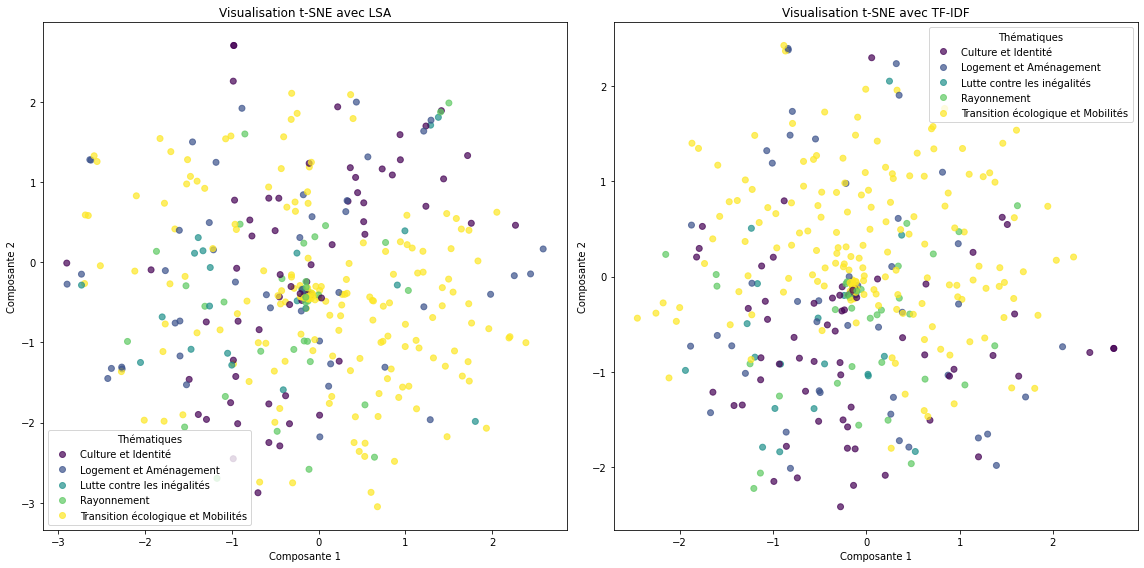

In [25]:

# Supposons que df_tf_idf_pandas contient la colonne 'thématique'
y = df_tf_idf_pandas['thématique']

# Encodez les labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Réduisez la dimensionnalité à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=0, init='pca', perplexity=100, n_jobs=-1, n_iter=650)

# Appliquez t-SNE sur les données réduites par LSA et TF-IDF
tsne_avec_lsa = tsne.fit_transform(reduced_lsa_idf)
tsne_avec_idf = tsne.fit_transform(tf_idf_matrix)

# Créer la figure avec deux sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Premier graphique : Visualisation des résultats avec LSA
scatter_lsa = axes[0].scatter(tsne_avec_lsa[:, 0], tsne_avec_lsa[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
axes[0].set_title("Visualisation t-SNE avec LSA")
axes[0].set_xlabel("Composante 1")
axes[0].set_ylabel("Composante 2")

# Ajouter les noms des thématiques dans la légende
handles_lsa, _ = scatter_lsa.legend_elements()
labels_lsa = le.classes_
axes[0].legend(handles_lsa, labels_lsa, title="Thématiques")

# Deuxième graphique : Visualisation des résultats avec TF-IDF
scatter_idf = axes[1].scatter(tsne_avec_idf[:, 0], tsne_avec_idf[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
axes[1].set_title("Visualisation t-SNE avec TF-IDF")
axes[1].set_xlabel("Composante 1")
axes[1].set_ylabel("Composante 2")

# Ajouter les noms des thématiques dans la légende
handles_idf, _ = scatter_idf.legend_elements()
labels_idf = le.classes_
axes[1].legend(handles_idf, labels_idf, title="Thématiques")

# Affichage de la figure
plt.tight_layout()
plt.show()


## Embeddings de mots, phrases/documents

1. **Représentation des mots (Word2Vec et BERT)**  
   Les embeddings de mots sont créés avec des modèles préentraînés comme **Word2Vec** et **BERT**, qui génèrent des vecteurs de dimension fixe pour chaque mot. Cela permet une intégration directe dans des modèles de machine learning, où chaque mot est représenté de manière dense tout en préservant sa sémantique contextuelle.
   
2. **Représentation des phrases et documents (USE, Word2Vec et BERT)**  
   **USE** génère des embeddings de phrases et documents sous forme de vecteurs fixes, adaptés aux modèles de machine learning. Pour **Word2Vec** et **BERT**, une agrégation moyenne des vecteurs de mots permet de créer un vecteur unique représentant le texte, également exploitable dans des modèles de machine learning.

---------

#### Analyse des embeddings générés  

Avant de commencer à créer des représentations de texte, nous définissons une fonction pour analyser les embeddings produits.  
Cette fonction permettra de :  
- **Vérifier la dimension des embeddings** pour une ligne du DataFrame.  
- **Afficher les statistiques descriptives** des embeddings pour l'ensemble du DataFrame.  

In [26]:
def analyse_embeddings_v2(proc, word_col=None, sentence_col=None):

    # Sélectionner la première ligne
    first_row = proc.first()

    if word_col:
        # Analyse des embeddings de mots pour la première ligne
        word_embeddings = first_row[word_col]
        num_word_vectors = len(word_embeddings)  # Nombre de vecteurs de mots
        word_vector_dim = len(word_embeddings[0])  # Dimension de chaque vecteur de mot

        print(f"1. Embeddings de mots ({word_col}) pour la première ligne :")
        print(f"   - Nombre de vecteurs (mots) : {num_word_vectors}")
        print(f"   - Dimension de chaque vecteur : {word_vector_dim}")
        print(f"   - Structure : Liste de {num_word_vectors} vecteurs, chacun de dimension {word_vector_dim}")

        # Afficher les premiers éléments des embeddings de mots pour la première ligne
        print("\nPremiers éléments des embeddings de mots (5 premières valeurs de chaque vecteur) pour la première ligne :")
        for i in range(min(5, num_word_vectors)):
            print(f"Mot {i+1}: {word_embeddings[i][:5]}...")

        # Afficher les statistiques descriptives de la longueur des embeddings de mots pour l'ensemble du DataFrame
        print("\nStatistiques descriptives de la longueur des embeddings de mots pour l'ensemble du DataFrame :")
        proc.select(size(word_col).alias("embedding_length")).describe().show()

    if sentence_col:
        # Analyse de l'embedding de phrase pour la première ligne
        sentence_embeddings = first_row[sentence_col]
        num_sentence_vectors = len(sentence_embeddings)  # Nombre de vecteurs de phrase
        sentence_embedding_dim = len(sentence_embeddings[0])  # Dimension de chaque vecteur de phrase

        print(f"\n2. Embedding de phrase ({sentence_col}) pour la première ligne :")
        print(f"   - Nombre de vecteurs : {num_sentence_vectors}")
        print(f"   - Dimension de chaque vecteur : {sentence_embedding_dim}")
        print(f"   - Structure : Liste de {num_sentence_vectors} vecteurs, chacun de dimension {sentence_embedding_dim}")

        # Afficher les premiers éléments des embeddings de phrase pour la première ligne
        print("\nPremiers éléments des embeddings de phrase (5 premières valeurs de chaque vecteur) pour la première ligne :")
        for i in range(min(5, num_sentence_vectors)):
            print(f"Phrase {i+1}: {sentence_embeddings[i][:5]}...")

        # Afficher les statistiques descriptives de la longueur des embeddings de phrase pour l'ensemble du DataFrame
        print("\nStatistiques descriptives de la longueur des embeddings de phrase pour l'ensemble du DataFrame :")
        proc.select(size(sentence_col).alias("embedding_length")).describe().show()


## **Word2Vec**

Nous utilisons le modèle pré-entraîné **"w2v_cc_300d"**, qui génère des embeddings de 300 dimensions pour chaque mot. Ce modèle est spécifiquement conçu pour représenter des mots en **français**, capturant les relations sémantiques entre les termes.

### Caractéristiques principales :
- **Architecture** : Modèle basé sur **Word2Vec**, utilisant les approches **Skip-gram** ou **CBOW** (Continuous Bag of Words) pour apprendre les représentations des mots à partir de leur contexte dans un corpus de texte.
- **Type d'embeddings** : **Statiques**, chaque mot possède un vecteur fixe, indépendamment de son contexte dans la phrase.
- **Relations sémantiques** : Représentation vectorielle des mots qui capture les relations sémantiques entre eux (par exemple, "roi" et "reine" sont plus proches que "roi" et "voiture").

Pour plus de détails :  
[Documentation officielle de w2v_cc_300d pour le français](https://sparknlp.org/2022/02/03/w2v_cc_300d_fr.html)

----


Nous utilisons les composants suivants dans notre pipeline :

- **`SentenceEmbeddings`** : Ce composant calcule les embeddings au niveau de la phrase en appliquant une stratégie de **pooling moyen** (AVERAGE), ce qui permet de créer une représentation vectorielle unique pour chaque phrase.

- **`EmbeddingsFinisher`** : Ce composant finalise les embeddings générés en transformant les représentations de mots et de phrases en vecteurs, adaptés à l'intégration dans des modèles de machine learning ou pour d'autres tâches analytiques.

In [27]:
from sparknlp.annotator import WordEmbeddingsModel, SentenceEmbeddings

# Génération des embeddings de mots
word2vec = WordEmbeddingsModel.pretrained("w2v_cc_300d", "fr") \
    .setInputCols(["document", "clean_lemma"]) \
    .setOutputCol("word_embeddings")

# Agrégation pour une représentation unique par document
sentence_embeddings = SentenceEmbeddings() \
    .setInputCols(["document", "word_embeddings"]) \
    .setOutputCol("sentence_embeddings_word") \
    .setPoolingStrategy("AVERAGE")

# Ajoutez l'EmbeddingsFinisher à votre pipeline
embeddings_finisher = EmbeddingsFinisher() \
    .setInputCols(["word_embeddings", "sentence_embeddings_word"]) \
    .setOutputCols(["word_embeddings_word2vec", "sentence_embeddings_word2vec"]) \
    .setOutputAsVector(True)


########################################
####### Construction du pipeline #######
########################################

pipeline = Pipeline(stages=[
    documentAssembler, 
    sentencerDL_multilang,
    tokenizer, 
    normalizer, 
    spellChecker, 
    lemmatizer, 
    stopWordsCleaner, 
    word2vec,
    sentence_embeddings,
    embeddings_finisher,
    finisher
])


# Données transformées par le pipeline
proc_word2vec = pipeline.fit(data_3v_cleaned).transform(data_3v_cleaned)

w2v_cc_300d download started this may take some time.
Approximate size to download 1.2 GB
[ / ]w2v_cc_300d download started this may take some time.
Approximate size to download 1.2 GB
[ \ ]Download done! Loading the resource.
[OK!]


In [28]:
# Appel de la fonction poour vérification
analyse_embeddings_v2(proc_word2vec, word_col="word_embeddings_word2vec", sentence_col="sentence_embeddings_word2vec")

1. Embeddings de mots (word_embeddings_word2vec) pour la première ligne :
   - Nombre de vecteurs (mots) : 56
   - Dimension de chaque vecteur : 300
   - Structure : Liste de 56 vecteurs, chacun de dimension 300

Premiers éléments des embeddings de mots (5 premières valeurs de chaque vecteur) pour la première ligne :
Mot 1: [ 0.0759      0.13789999 -0.0712      0.0122      0.0023    ]...
Mot 2: [-0.1049  0.0702  0.0453 -0.0664  0.0141]...
Mot 3: [-0.0007  0.073  -0.0062 -0.0119 -0.0665]...
Mot 4: [ 0.0834 -0.0869 -0.0152  0.0596 -0.1541]...
Mot 5: [-0.0492  0.0037 -0.0538 -0.074  -0.0873]...

Statistiques descriptives de la longueur des embeddings de mots pour l'ensemble du DataFrame :


+-------+-----------------+
|summary| embedding_length|
+-------+-----------------+
|  count|              353|
|   mean|69.69405099150141|
| stddev|  81.472613871777|
|    min|                5|
|    max|              571|
+-------+-----------------+


2. Embedding de phrase (sentence_embeddings_word2vec) pour la première ligne :
   - Nombre de vecteurs : 1
   - Dimension de chaque vecteur : 300
   - Structure : Liste de 1 vecteurs, chacun de dimension 300

Premiers éléments des embeddings de phrase (5 premières valeurs de chaque vecteur) pour la première ligne :
Phrase 1: [ 0.01932679  0.03816606  0.00213929  0.00162143 -0.03854464]...

Statistiques descriptives de la longueur des embeddings de phrase pour l'ensemble du DataFrame :


+-------+----------------+
|summary|embedding_length|
+-------+----------------+
|  count|             353|
|   mean|             1.0|
| stddev|             0.0|
|    min|               1|
|    max|               1|
+-------+----------------+



**Observation des structures du data**

In [29]:
data_vec2 = proc_word2vec.select("thématique", "word_embeddings_word2vec", "sentence_embeddings_word2vec")

data_vec2.printSchema()
data_vec2.show(5)

root
 |-- thématique: string (nullable = true)
 |-- word_embeddings_word2vec: array (nullable = true)
 |    |-- element: vector (containsNull = true)
 |-- sentence_embeddings_word2vec: array (nullable = true)
 |    |-- element: vector (containsNull = true)

+--------------------+------------------------+----------------------------+
|          thématique|word_embeddings_word2vec|sentence_embeddings_word2vec|
+--------------------+------------------------+----------------------------+
|Transition écolog...|    [[0.0759000033140...|        [[0.0193267855793...|
|         Rayonnement|    [[0.0182000007480...|        [[0.0133549999445...|
|Transition écolog...|    [[-0.033300001174...|        [[0.0074079995974...|
|Transition écolog...|    [[0.0240000002086...|        [[0.0454735830426...|
|Lutte contre les ...|    [[0.1255999952554...|        [[0.0183580629527...|
+--------------------+------------------------+----------------------------+
only showing top 5 rows



**On constate** 
- les variables d'embedding contiennent des tableaux de vecteurs, chaque élément représentant un mot ou une phrase dans un espace vectoriel. 
- Pour effectuer une visualition clustering/classification il est nécessaire d'aplatir ces vecteurs. Cela consiste à convertir des tableaux de vecteurs (par exemple, `array<vector>`) en un format 2D, 

In [30]:
# Étape 1: Aplatir les mots en fonction des thématiques
flattened_df = proc_word2vec.select("thématique","token_lemma",explode("word_embeddings_word2vec").alias("embedding"))

flattened_df.show(3)
flattened_df.printSchema()

+--------------------+--------------------+--------------------+
|          thématique|         token_lemma|           embedding|
+--------------------+--------------------+--------------------+
|Transition écolog...|[canal, saint, ma...|[0.07590000331401...|
|Transition écolog...|[canal, saint, ma...|[-0.1049000024795...|
|Transition écolog...|[canal, saint, ma...|[-6.9999997504055...|
+--------------------+--------------------+--------------------+
only showing top 3 rows

root
 |-- thématique: string (nullable = true)
 |-- token_lemma: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- embedding: vector (nullable = true)



In [31]:
flattened_df.count()

24602

In [32]:
from pyspark.sql import functions as F

# Compter les occurrences de chaque embedding
duplicates_count = (flattened_df
                    .groupBy("embedding")
                    .agg(F.count("*").alias("count"))
                    .filter(F.col("count") > 1))

# Afficher le nombre de vecteurs dupliqués
num_duplicates = duplicates_count.count()
print(f"Nombre de vecteurs dupliqués : {num_duplicates}")

# Optionnel : Afficher les vecteurs dupliqués avec leur compte
duplicates_count.show()


Nombre de vecteurs dupliqués : 2519


+--------------------+-----+
|           embedding|count|
+--------------------+-----+
|[0.02889999933540...|    2|
|[0.00749999983236...|    7|
|[0.02349999919533...|    4|
|[0.02129999920725...|    3|
|[0.00249999994412...|   37|
|[0.02989999949932...|    9|
|[-0.0062000001780...|    2|
|[0.09340000152587...|    3|
|[-0.0107000004500...|    3|
|[0.03390000015497...|    6|
|[-0.0017999999690...|    2|
|[0.03150000050663...|    2|
|[0.06319999694824...|    3|
|[0.02590000070631...|    9|
|[0.08169999718666...|    5|
|[0.03290000185370...|    4|
|[0.02999999932944...|    8|
|[-0.0313999988138...|    4|
|[0.00480000022798...|    2|
|[-0.0234999991953...|    5|
+--------------------+-----+
only showing top 20 rows



**On constate que les résultats obtenus sont conformes aux attentes** : 
 - Les embeddings de mots représentent chaque mot individuellement (55 mots) avec des vecteurs de dimension 300.
 - L'embedding de la phrase est constitué d'un vecteur unique de dimension 300.

## **BERT (Bidirectional Encoder Representations from Transformers)**

Nous utilisons le modèle pré-entraîné **"bert_embeddings_bert_base_5lang_cased"**, qui génère des vecteurs de 768 dimensions pour chaque mot. Ce modèle est spécifiquement conçu pour être multilingue, incluant le **français** parmi les langues supportées.

### Caractéristiques principales :
- **Architecture** : Basé sur des **Transformers bidirectionnels** avec une approche **contextuelle**, où chaque mot est interprété en fonction de son contexte dans la phrase.
- **Type d'embeddings** : **Contextuels**, **Dynamiques** chaque mot peut avoir une représentation différente selon son contexte dans la phrase, contrairement aux embeddings statiques comme ceux générés par Word2Vec.
- **Représentation contextuelle** : Permet de capturer les nuances sémantiques et les ambiguïtés des mots en fonction de leur contexte, ce qui améliore la précision pour des tâches complexes de traitement de texte.

In [33]:
from sparknlp.annotator import WordEmbeddingsModel, SentenceEmbeddings

# Charger le modèle BERT
bert_embeddings = BertEmbeddings.pretrained("bert_embeddings_bert_base_5lang_cased", "fr") \
    .setInputCols(["document", "clean_lemma"]) \
    .setOutputCol("bert_embeddings") \
    .setCaseSensitive(True)

# Agrégation pour une représentation unique par document
sentence_embeddings = SentenceEmbeddings() \
    .setInputCols(["document", "bert_embeddings"]) \
    .setOutputCol("sentence_embeddings_word") \
    .setPoolingStrategy("AVERAGE")

# Ajoutez l'EmbeddingsFinisher à votre pipeline
embeddings_finisher = EmbeddingsFinisher() \
    .setInputCols(["bert_embeddings", "sentence_embeddings_word"]) \
    .setOutputCols(["word_embeddings_bert", "sentence_embeddings_bert"]) \
    .setOutputAsVector(True)



########################################
####### Construction du pipeline #######
########################################

pipeline = Pipeline(stages=[
    documentAssembler, 
    sentencerDL_multilang,
    tokenizer, 
    normalizer, 
    spellChecker, 
    lemmatizer, 
    stopWordsCleaner, 
    bert_embeddings,
    sentence_embeddings,
    embeddings_finisher,
    finisher
])



# Données transformées par le pipeline
proc_bert = pipeline.fit(data_3v_cleaned).transform(data_3v_cleaned)

bert_embeddings_bert_base_5lang_cased download started this may take some time.
Approximate size to download 442.5 MB
[ / ]bert_embeddings_bert_base_5lang_cased download started this may take some time.
Approximate size to download 442.5 MB
[ — ]Download done! Loading the resource.
[OK!]


In [34]:
# Appel de la fonction poour vérification
analyse_embeddings_v2(proc_bert, word_col="word_embeddings_bert", sentence_col="sentence_embeddings_bert")

1. Embeddings de mots (word_embeddings_bert) pour la première ligne :
   - Nombre de vecteurs (mots) : 56
   - Dimension de chaque vecteur : 768
   - Structure : Liste de 56 vecteurs, chacun de dimension 768

Premiers éléments des embeddings de mots (5 premières valeurs de chaque vecteur) pour la première ligne :
Mot 1: [-0.15266794 -0.0869056   0.56548822  0.4498848   0.37194997]...
Mot 2: [ 0.19362798 -0.41569543 -0.68600553  0.74152786  0.87532949]...
Mot 3: [-0.05961452  0.02220307  0.63525009  0.52026993  0.46353859]...
Mot 4: [-0.30977997 -0.26518431  0.34200349  0.50746298 -0.04547077]...
Mot 5: [-0.04305122 -0.42941642  0.07300374  0.39383438  0.21494728]...

Statistiques descriptives de la longueur des embeddings de mots pour l'ensemble du DataFrame :


+-------+------------------+
|summary|  embedding_length|
+-------+------------------+
|  count|               353|
|   mean| 47.43909348441926|
| stddev|25.279064084615097|
|    min|                 5|
|    max|                93|
+-------+------------------+


2. Embedding de phrase (sentence_embeddings_bert) pour la première ligne :
   - Nombre de vecteurs : 1
   - Dimension de chaque vecteur : 768
   - Structure : Liste de 1 vecteurs, chacun de dimension 768

Premiers éléments des embeddings de phrase (5 premières valeurs de chaque vecteur) pour la première ligne :
Phrase 1: [-0.15638129 -0.27903673  0.33052081  0.26363146 -0.06523158]...

Statistiques descriptives de la longueur des embeddings de phrase pour l'ensemble du DataFrame :


+-------+----------------+
|summary|embedding_length|
+-------+----------------+
|  count|             353|
|   mean|             1.0|
| stddev|             0.0|
|    min|               1|
|    max|               1|
+-------+----------------+



## **UniversalSentenceEncoder**

Nous utilisons le modèle pré-entraîné **"tfhub_use_multi"**, qui génère des embeddings de 512 dimensions pour chaque phrase. Ce modèle est conçu pour être multilingue, prenant en charge plusieurs langues, dont le **français**.

### Caractéristiques principales :
- **Architecture** : Basé sur des **Transformers** avec une approche de **pooling de phrases**.
- **Type d'embeddings** : **Contextuels** et **fixes** pour des phrases entières, offrant une représentation vectorielle globale de la phrase.
- Génère des embeddings de **phrases entières**, ce qui permet une meilleure compréhension du sens global de la phrase.


### Différences avec **Word2Vec** et **BERT** :
- **Word2Vec** génère des embeddings de mots statiques, tandis que **UniversalSentenceEncoder** génère des embeddings pour des **phrases entières**.
- **BERT** génère des embeddings contextuels et dynamiques pour chaque mot en fonction du contexte, tandis que **UniversalSentenceEncoder** génère une seule représentation pour l'ensemble de la phrase.

### Différences avec **Word2Vec** et **BERT** :
- **Word2Vec** génère des embeddings de mots **statiques**, où chaque mot a une représentation fixe indépendante du contexte. Cela permet une représentation individuelle des mots mais ne capte pas les nuances contextuelles.
- **BERT** génère des embeddings **contextuels** et **dynamiques**, où chaque mot a une représentation qui évolue en fonction du contexte. Cela permet de mieux capturer les subtilités du langage, mais nécessite une agrégation pour obtenir des représentations de phrases.
- **UniversalSentenceEncoder** génère des embeddings **fixes pour des phrases entières**, où une seule représentation est produite pour chaque phrase, grâce à une approche de **pooling global**. Cela permet de saisir le sens global de la phrase, mais sans les détails contextuels précis pour chaque mot.


In [35]:

use = UniversalSentenceEncoder.pretrained("tfhub_use_multi", "xx") \
      .setInputCols(["document"]) \
      .setOutputCol("use_embeddings")


# Ajoutez l'EmbeddingsFinisher à votre pipeline
embeddings_finisher = EmbeddingsFinisher() \
    .setInputCols(["use_embeddings"]) \
    .setOutputCols(["sentence_use"]) \
    .setOutputAsVector(True)


########################################
####### Construction du pipeline #######
########################################

pipeline = Pipeline(stages=[
    documentAssembler, 
    sentencerDL_multilang,
    tokenizer, 
    normalizer, 
    spellChecker, 
    lemmatizer, 
    stopWordsCleaner, 
    use,
    embeddings_finisher,
    finisher
])


# Données transformées par le pipeline
proc_use = pipeline.fit(data_3v_cleaned).transform(data_3v_cleaned)

tfhub_use_multi download started this may take some time.
Approximate size to download 247.6 MB
[ | ]25/01/27 21:01:52 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
25/01/27 21:01:52 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
tfhub_use_multi download started this may take some time.
Approximate size to download 247.6 MB
[ \ ]Download done! Loading the resource.
[OK!]


In [36]:
# Appel de la fonction poour vérification
analyse_embeddings_v2(proc_use, sentence_col="sentence_use")


2. Embedding de phrase (sentence_use) pour la première ligne :
   - Nombre de vecteurs : 1
   - Dimension de chaque vecteur : 512
   - Structure : Liste de 1 vecteurs, chacun de dimension 512

Premiers éléments des embeddings de phrase (5 premières valeurs de chaque vecteur) pour la première ligne :
Phrase 1: [-0.0459339  -0.03962529 -0.02739445 -0.04153804  0.06208748]...

Statistiques descriptives de la longueur des embeddings de phrase pour l'ensemble du DataFrame :


+-------+----------------+
|summary|embedding_length|
+-------+----------------+
|  count|             353|
|   mean|             1.0|
| stddev|             0.0|
|    min|               1|
|    max|               1|
+-------+----------------+



# **Préparation des données pour**

- **Visualisation** : Représenter les données dans un espace vectoriel pour mieux comprendre leur structure.
- **Clustering** : Identifier des regroupements cohérents de mots ou phrases selon leurs similarités.

`Nous allons commencer par une fonction qui associe les mots (ou phrases) à leurs vecteurs d’embeddings, tout en ajoutant un label numérique basé sur la thématique.`

In [37]:
def combine_embeddings_and_words(data: DataFrame, words_col: str, embeddings_col: str, words_sentences: str):
   
    # Étape 1: Aplatir les DataFrames
    flattened_words = data.select("Identifiant", "thématique", explode(words_col).alias(words_sentences))
    flattened_embeddings = data.select("Identifiant", "thématique", explode(embeddings_col).alias("embedding"))
    
    # Vérification préalable du nombre de lignes
    if flattened_embeddings.count() != flattened_words.count():
        raise ValueError("Les DataFrames n'ont pas le même nombre de lignes après l'explosion.")
    
    # Étape 2: Ajouter un index unique à chaque DataFrame
    flattened_embeddings = flattened_embeddings.withColumn("index", monotonically_increasing_id())
    flattened_words = flattened_words.withColumn("index", monotonically_increasing_id())
    
    # Étape 3: Combiner les DataFrames
    combined_df = flattened_embeddings.join(flattened_words, on=["Identifiant", "thématique", "index"]).drop("index")
    
    # Réorganiser les colonnes pour que 'mot' soit avant 'embedding'
    combined_df = combined_df.select("Identifiant", "thématique", words_sentences, "embedding")
    
    # Vérification finale du nombre de lignes
    if combined_df.count() != flattened_embeddings.count():
        raise ValueError("Le nombre de lignes du DataFrame combiné ne correspond pas au nombre initial.")
        
    
    # Étape 4: Ajouter la colonne 'label' pour la thématique
    indexer = StringIndexer(inputCol="thématique", outputCol="label")
    combined_df = indexer.fit(combined_df).transform( combined_df)
    
    return combined_df


In [38]:
##################################################
##############  Pour les mots ####################
##################################################

# Bert
bert_words = combine_embeddings_and_words(data=proc_bert, words_col="bert_embeddings.result", 
                                          embeddings_col="word_embeddings_bert", words_sentences="words")

# Word2vec
word2vec_words = combine_embeddings_and_words(data=proc_word2vec, words_col="word_embeddings.result", 
                                          embeddings_col="word_embeddings_word2vec", words_sentences="words")


# TF*idf
tfidf_df = tf_idf_df.select("thématique","token_lemma","tf_idf")
indexer = StringIndexer(inputCol="thématique", outputCol="label")

tfidf_df = indexer.fit(tfidf_df).transform(tfidf_df)


###################################################
############ Pour les phrases #####################
###################################################

# Use
use_sentences = combine_embeddings_and_words(data= proc_use, words_col="use_embeddings.result", 
                                          embeddings_col="sentence_use", words_sentences="sentences") 

# Bert
bert_sentences = combine_embeddings_and_words(data= proc_bert, words_col="sentence_embeddings_word.result", 
                                          embeddings_col="sentence_embeddings_bert", words_sentences="sentences")

# word2vec
word2vec_sentences = combine_embeddings_and_words(data=proc_word2vec, words_col="sentence_embeddings_word.result", 
                                          embeddings_col="sentence_embeddings_word2vec", words_sentences="sentences")


## **Représentation Visuelle des Embeddings**

### **1. Choix de t-SNE :**
- Adapté aux données non linéaires, permettant de préserver la structure locale des données tout en révélant des clusters significatifs.  
- Paramètres clés :
  - **Perplexité** : Équilibre entre la préservation des structures locales et globales.  
  - **Nombre d'itérations (n_iter)** : Influence la qualité et la stabilité de la convergence.  
  - **Learning rate** : Contrôle la vitesse d’apprentissage et la précision des résultats.  

### **2. Améliorations pour la Visualisation :**
- **Réduction du bruit** : Une **ACP** a été réalisée avant t-SNE, en préservant 90 % de la variance totale des données. Cela permet d’éliminer les dimensions non informatives et de réduire le bruit.  
- **Hyperparamètres :**
  - **Perplexité** : Fixée à 80, offrant un bon compromis entre la structure locale et globale.  
  - **n_iter** et **learning_rate** : Laissés aux valeurs par défaut pour garantir une stabilité initiale et limiter la complexité de l’optimisation.  

`Une optimisation plus approfondie des hyperparamètres aurait pu être envisagée`. Cependant, notre approche visait à privilégier une configuration simple, reproductible et efficace pour cette première analyse.  


In [39]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder


def plot_tsne(data_word=None, data_sentence=None):
    # Créer une figure avec deux sous-graphes côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Fonction pour appliquer t-SNE et visualiser les résultats
    def apply_and_plot_tsne(data, ax, title):
        if data is not None:
            # Convertir le DataFrame PySpark en DataFrame Pandas
            pandas_df = data.toPandas()
            
            # Extraire les embeddings et les thématiques
            X = np.array(pandas_df["embedding"].tolist())
            y = pandas_df["thématique"]
            
            # Appliquer PCA pour réduire la dimensionnalité
            pca = PCA(n_components=0.90)
            X_pca = pca.fit_transform(X)
            
            # Convertir les étiquettes en catégories numériques
            le = LabelEncoder()
            y_encoded = le.fit_transform(y)
            
            # Appliquer t-SNE sur les données réduites par PCA
            tsne = TSNE(n_components=2, random_state=42, perplexity=40, early_exaggeration=12, metric='euclidean')
            
            X_tsne = tsne.fit_transform(X_pca)
            
            # Visualiser les résultats t-SNE
            scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
            ax.set_title(title)
            ax.set_xlabel("Composante t-SNE 1")
            ax.set_ylabel("Composante t-SNE 2")
            
            # Créer une légende
            handles, labels = scatter.legend_elements()
            ax.legend(handles, le.classes_, title="Thématiques")
        else:
            ax.set_title("Aucune donnée disponible")
            ax.axis('off')  # Masquer l'axe si aucune donnée
            
    ### Appel des fonctions ######

    # Appliquer t-SNE et visualiser pour les mots
    apply_and_plot_tsne(data_word, axes[0], "t-SNE des Embeddings de Mots")
    
    # Appliquer t-SNE et visualiser pour les phrases
    apply_and_plot_tsne(data_sentence, axes[1], "t-SNE des Embeddings de Phrases")
    
    plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
    plt.show()

                                    W O R D 2 V E C 


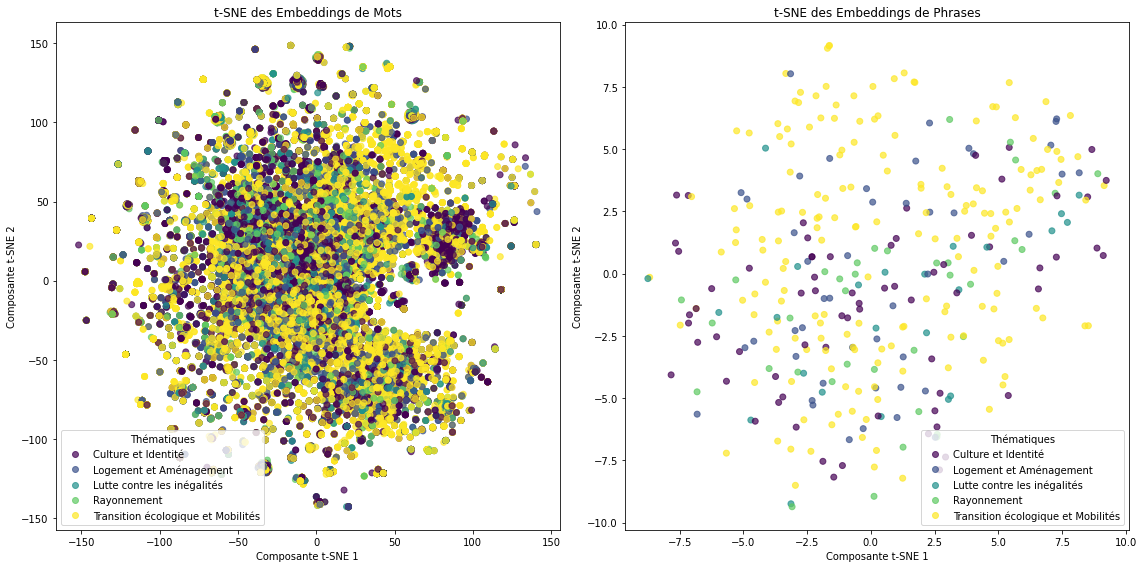

                                    B E R T 


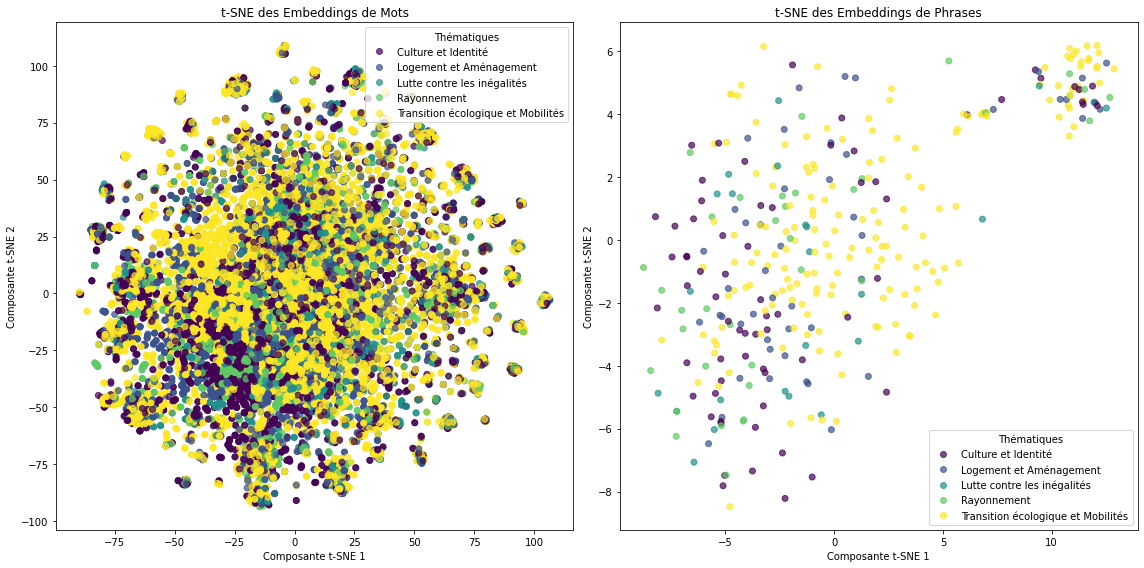

                                    U S E 


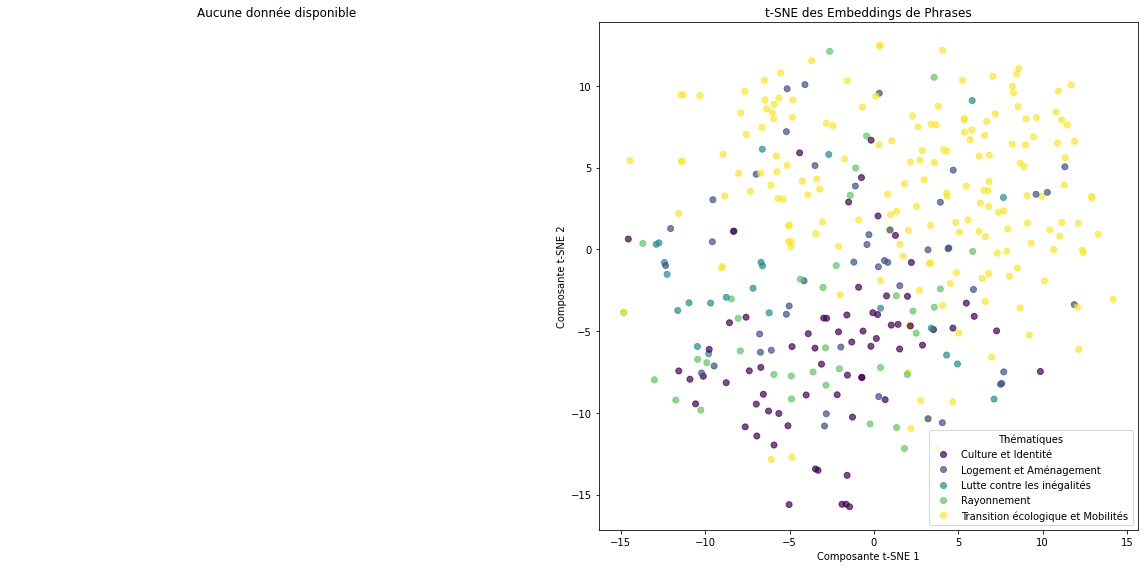

In [40]:
###########################################
###########  Visualisation  ###############
###########################################

print("=" * 80)
print(" " * 35 + " W O R D 2 V E C ")
print("=" * 80)
plot_tsne(data_word= word2vec_words, data_sentence= word2vec_sentences)

print("=" * 80)
print(" " * 35 + " B E R T ")
print("=" * 80)
plot_tsne(data_word=bert_words, data_sentence=bert_sentences) 

print("=" * 80)
print(" " * 35 + " U S E ")
print("=" * 80)
plot_tsne(data_sentence= use_sentences ) 


#### **1. Analyse des Résultats des Méthodes d’Embedding de Mots**

Les différentes méthodes testées (TF-IDF avec et sans LSA, Word2Vec, BERT préentraîné) montrent une forte concentration des points autour du centre, avec un chevauchement significatif. Plusieurs facteurs peuvent expliquer ce phénomène :  

- **Complexité thématique et similarité sémantique** : Les cinq thématiques abordent des sujets interconnectés, partageant des idées ou des objectifs communs. Par exemple, l'idée de "favoriser des logements accessibles" peut concerner à la fois le Logement et la Lutte contre les inégalités. Ce chevauchement naturel des concepts et l'utilisation d'un vocabulaire commun expliquent la difficulté à obtenir une séparation nette dans l’espace vectoriel.

- **Densité d'information** : La concentration des points autour du centre indique une densité élevée d'idées similaires ou connexes, ce qui limite la distinction claire entre les thématiques dans l’espace vectoriel.

- **Taille et diversité du corpus** : Un corpus restreint ou peu diversifié limite la capacité des modèles à capturer des nuances subtiles, ce qui contribue à la concentration observée des points.  



#### **2. Analyse des Résultats des Représentations des documents/phrases (Word2Vec et BERT, USE )**

- **Séparation thématique améliorée** :  
  L’agrégation des vecteurs de mots (Word2Vec, BERT) ou l’utilisation directe d’USE produit une dispersion accrue des points dans l’espace vectoriel, reflétant une meilleure différenciation des thématiques.

- **Absence de groupes distincts** : La similitude sémantique entre certaines idées ainsi qu’une homogénéité des thématiques peut expliquer pourquoi les points restent proches sans former des groupes bien définis.  


**Conclusion générale**
L’utilisation de Word2Vec, BERT préentraîné et USE améliore la séparation des points dans l’espace vectoriel, reflétant une meilleure prise en compte des variations sémantiques. Cependant, l’absence de clusters distincts souligne une homogénéité thématique persistante limitant la différenciation nette entre les thématiques.

# **Clustering pour l’extraction de termes pertinents**

L'avantage d'effectuer un clustering en complément d'une méthode d'embedding comme TF-IDF, Word2Vec ou BERT pour extraire des termes pertinents est multiple :

- **Regroupement thématique** : Le clustering regroupe des termes similaires en **clusters thématiques** selon leur **proximité sémantique**. Contrairement aux embeddings seuls, qui placent les termes dans un espace vectoriel sans structure, le clustering organise ces termes en **groupes cohérents**, facilitant ainsi l’identification de **thématiques distinctes**.

- **Amélioration de la pertinence / Découverte de structures cachées** : Le clustering aide à découvrir des **relations cachées** entre les termes en les regroupant dans des **clusters thématiques**, ce qui permet de mieux comprendre l'intention sous-jacente des données. Cela conduit à une extraction plus **précise** et **pertinente** des informations, en fonction des **structures sous-jacentes**.

- **Facilitation de l'analyse à grande échelle / Réduction de la complexité** : En regroupant les termes similaires, le clustering réduit la **dimensionnalité** des données, ce qui simplifie l’analyse et améliore l’**interprétation des résultats**.


##  **Application de KMeans et Comparaison des Représentations Vectorielles**

**Étape 1 : Application du modèle KMeans**  
Nous appliquons le modèle **KMeans** sur les différentes représentations vectorielles des mots (ou phrases) afin de regrouper les termes similaires en clusters. L’objectif est de tester quelle représentation vectorielle produit les clusters les plus cohérents et significatifs.

**Étape 2 : Évaluation des performances du clustering**  
Nous utilisons deux métriques pour évaluer la qualité des clusters formés par KMeans :
- **Silhouette Score** : Cette métrique mesure la compacité des clusters et la distance entre les clusters. Un score élevé indique de bons clusters bien compacte et séparés.
- **Davies-Bouldin Index** : Cet indice évalue la séparation et la compacité des clusters (inter-cluster et intra-cluster). Un indice plus faible indique une meilleure qualité de clustering, facilitant la comparaison des différentes représentations vectorielles.

**Étape 3 : Réduction de Dimension embedding words**  
Après l’application de l'algorithme KMeans, une réduction de dimension est réalisée sur les embeddings des mots. Cette étape permet de simplifier la représentation des données, réduisant ainsi la complexité et le chevauchement possible des clusters
ce qui facilite une meilleure interprétation des résultats.


In [44]:
from sklearn import metrics
from sklearn.metrics import homogeneity_score, davies_bouldin_score

from pyspark.ml.feature import PCA

# reduction d'affichages d'avertissments
spark.sparkContext.setLogLevel("ERROR")

################################
# Fonction pour appliquer KMeans
###############################

def apply_kmeans(data, embedding_column):
    kmeans = KMeans(featuresCol=embedding_column, k=5, initMode="k-means||", predictionCol='prediction', seed=12)
    model = kmeans.fit(data)
    clustered_df = model.transform(data)
    return clustered_df


##################################################
# Fonction pour évaluer les résultats du clustering
####################################################

def evaluation_metrique(clustered_df, embedding_column):
    # Définition de l'évaluateur pour le score de Silhouette
    evaluator = ClusteringEvaluator(predictionCol='prediction',  # Colonne des prédictions (cluster)
                                     featuresCol=embedding_column,  # Colonne des features (embeddings)
                                     metricName='silhouette',  # Score de silhouette
                                     distanceMeasure='squaredEuclidean')  # Mesure de distance utilisée

    # Calcul du score de silhouette
    silhouette_score = evaluator.evaluate(clustered_df)

    # Conversion en DataFrame kmeans en Pandas pour calculer les métriques
    v = clustered_df.select("label", "prediction").toPandas()

    # Extraction des labels et prédictions pour le calcul du Davies-Bouldin score
    labels_true = v["label"]
    labels_pred = v["prediction"]

    # Calcul du Davies-Bouldin score
    db_score = davies_bouldin_score(labels_true.values.reshape(-1, 1), labels_pred)

    print(f"Silhouette Score: {silhouette_score}")
    print(f"Davies-Bouldin Score: {db_score}")
    print("------ Autre métriques -------")
    print("Homogeneity Score:", homogeneity_score(labels_true, labels_pred))
    print("Adjusted Rand Index:", metrics.adjusted_rand_score(labels_true, labels_pred))
    print("Adjusted Mutual Information:", metrics.adjusted_mutual_info_score(labels_true, labels_pred))
    
    

#############################################
### Réduction pour les représentations de mots
############################################

def apply_pca(data, embedding_column, reduc_variance):
    # Récupérer la dimension de l'embedding (assurez-vous que la colonne est bien présente)
    sample_embedding = data.select(embedding_column).first()[0]
    num_components = len(sample_embedding)  # Utilisation de la longueur de l'embedding

    # Appliquer PCA pour réduire la dimensionnalité avec un nombre initial de composants
    pca = PCA(k=num_components, inputCol=embedding_column, outputCol="pca_features")
    pca_model = pca.fit(data)

    # Récupérer les variances expliquées par chaque composant
    variances = pca_model.explainedVariance.toArray()  # Convertir en tableau numpy

    # Calculer les variances cumulées
    cumulative_variances = np.cumsum(variances)

    # Trouver le nombre de composantes nécessaires pour atteindre la variance cible
    n_components = np.argmax(cumulative_variances >= reduc_variance) + 1
    print(f"Nombre de composantes pour {reduc_variance * 100}% de variance : {n_components}")

    # Appliquer PCA avec le nombre de composants calculé pour atteindre la variance cible
    pca = PCA(k=n_components, inputCol=embedding_column, outputCol="pca_features")
    pca_model = pca.fit(data)
    pca_result = pca_model.transform(data)

    return pca_result

**Application pour les documents**

In [42]:
# Liste des DataFrames et des colonnes d'embedding
phrases_data = [
    (use_sentences, "embedding", "USE"),
    (bert_sentences, "embedding", "BERT"),
    (word2vec_sentences, "embedding", "Word2Vec")
]

# Appliquer KMeans et évaluer les résultats pour chaque modèle d'embedding
for data, col_emb, model_name in phrases_data:
    print(f"\nAnalyse pour {model_name} sentences:")

    # Appliquer KMeans
    clustered_df = apply_kmeans(data, embedding_column=col_emb)

    # Évaluer les résultats du clustering
    evaluation_metrique(clustered_df, embedding_column=col_emb)


Analyse pour USE sentences:


Silhouette Score: 0.042037933357417914
Davies-Bouldin Score: 11.384773045510444
------ Autre métriques -------
Homogeneity Score: 0.19392019881503436
Adjusted Rand Index: 0.16571553520737473
Adjusted Mutual Information: 0.16430399546339497

Analyse pour BERT sentences:


Silhouette Score: 0.006636928208721049
Davies-Bouldin Score: 8.00267416683957
------ Autre métriques -------
Homogeneity Score: 0.030370621289726462
Adjusted Rand Index: 0.016586411346445052
Adjusted Mutual Information: 0.018207096382460285

Analyse pour Word2Vec sentences:


Silhouette Score: 0.10002620276742492
Davies-Bouldin Score: 9.203907940749973
------ Autre métriques -------
Homogeneity Score: 0.04380692492854331
Adjusted Rand Index: -0.03245855087249157
Adjusted Mutual Information: 0.030435658640121977


**Application pour les mots**

In [45]:
mots_data = [
    (bert_words, "embedding", "BERT"),  
    (word2vec_words, "embedding", "Word2Vec"), 
    (tfidf_df, "tf_idf", "TF*IDF")  
]


# Appliquer PCA pour chaque modèle et conserver 88% de la variance expliquée
for data, col_emb, model_name in mots_data:
    print(f"\nAnalyse pour {model_name} Words...")
    
    # Appliquer PCA avec 88% de variance expliquée
    pca_result = apply_pca(data, embedding_column=col_emb, reduc_variance=0.88)
    
    # Appliquer KMeans ou d'autres traitements sur pca_result
    clustered_df = apply_kmeans(pca_result, embedding_column="pca_features")  # Utiliser "pca_features"
    
    # Évaluer les résultats du clustering
    evaluation_metrique(clustered_df, embedding_column="pca_features")  # Utiliser "pca_features"
    


Analyse pour BERT Words...


Nombre de composantes pour 88.0% de variance : 235


Silhouette Score: 0.024230779787698737
Davies-Bouldin Score: 67.73626560801839
------ Autre métriques -------
Homogeneity Score: 0.006664434804200357
Adjusted Rand Index: -0.015683415951005936
Adjusted Mutual Information: 0.00626666941600899

Analyse pour Word2Vec Words...


Nombre de composantes pour 88.0% de variance : 123


Silhouette Score: 0.5281253664516811
Davies-Bouldin Score: 28.85841598323327
------ Autre métriques -------
Homogeneity Score: 0.001870961366992738
Adjusted Rand Index: -0.011803128322488128
Adjusted Mutual Information: 0.0023127933914030784

Analyse pour TF*IDF Words...


Nombre de composantes pour 88.0% de variance : 118


Silhouette Score: 0.6170716823606484
Davies-Bouldin Score: 14.364970169172201
------ Autre métriques -------
Homogeneity Score: 0.009790629699874742
Adjusted Rand Index: -0.0017608419153479896
Adjusted Mutual Information: -0.003070627844849577


#### **Conclusion**

In [46]:
### Tableau de résumé

# Données pour les phrases
sentences_data = {
    "Analyse": ["USE sentences", "BERT sentences", "Word2Vec sentences"],
    "Silhouette Score": [0.042, 0.006, 0.10],
    "Davies-Bouldin Score": [11.38, 8.00, 9.203]
}

# Données pour les mots
words_data = {
    "Analyse": ["BERT Words", "Word2Vec Words", "TF*IDF Words"],
    "Nombre de composantes": [235, 123, 118],
    "Silhouette Score": [0.024, 0.528, 0.617],
    "Davies-Bouldin Score": [67.736, 28.858, 14.364]
}

# Création des DataFrames
sentences_df = pd.DataFrame(sentences_data)
words_df = pd.DataFrame(words_data)

# Conversion en HTML
sentences_html = sentences_df.to_html(index=False)
words_html = words_df.to_html(index=False)

# Fusion des tableaux côte à côte
html_content = f"""
<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 20px;">
        <h3>Tableau des documents</h3>
        {sentences_html}
    </div>
    <div>
        <h3>Tableau des mots</h3>
        {words_html}
    </div>
</div>
"""

# Affichage dans un environnement Jupyter
display(HTML(html_content))


**On constate** que les méthodes de représentation vectorielle plus simples comme `Word2Vec et TF*IDF`semblent mieux s'adapter aux données et produire des clusters de meilleure qualité.

1. **Silhouette Score**:
   - Phrases : Les scores de silhouette sont relativement bas pour toutes les méthodes, indiquant une faible cohésion et séparation des clusters.
   - Mots : Les scores de silhouette sont plus élevés pour Word2Vec et TF*IDF, suggérant une meilleure cohésion et séparation des clusters
   
2. **Davies-Bouldin Score**:
   - Phrases : Les scores sont élevés, indiquant une mauvaise séparation des clusters.
   - Mots : Les scores sont plus bas pour Word2Vec et TF*IDF, indiquant une meilleure séparation des clusters.
   
---------

## **Tableau de contingence entre les clusters et les thématiques**

On peut visualiser pour les clusring garder

In [47]:
# Chargement
sentence_word2vec_clusters= spark.read.parquet("Word2Vec_clusters.parquet")
words_word2vec_clusters= spark.read.parquet("Word2Vec_clusters_words.parquet")
tfidf_clusters= spark.read.parquet("TF*IDF_clusters_words.parquet")

In [48]:
def plot_heatmap(data):
    
    data = data.select("label", "thématique", "prediction").toPandas()
    
    # Convertir les colonnes en chaînes de caractères pour éviter les erreurs
    data["label"] = data["label"].astype(str)
    data["thématique"] = data["thématique"].astype(str)
    data["prediction"] = data["prediction"].astype(str)
    
    # Ajouter une colonne combinée "label + thématique"
    data["thématique_label"] = data["label"] + " - " + data["thématique"]
    
    # Créer le tableau croisé
    crosstab = pd.crosstab(data["thématique_label"].values, data["prediction"].values)
    crosstab.rename_axis(columns="Cluster", index="Thème + Label", inplace=True)
    
    
    # Visualisation avec la heatmap
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(
        crosstab,
        annot=True,       # Afficher les valeurs
        fmt="d",          # Format des nombres
        cmap="Purples",   # Palette de couleurs
        cbar_kws={"shrink": 0.8},  # Taille de la barre de couleur
        ax=ax,
    )
    
    # Ajouter des titres
    ax.set_title("Matrice de Confusion avec Labels et Thématiques", fontsize=16, weight="bold")
    ax.set_xlabel("Clusters prédits", fontsize=14)
    ax.set_ylabel("Thème et Labels réels", fontsize=14)
    
    # Ajuster les marges
    plt.tight_layout()
    plt.show()


                                    Word2vec pour document


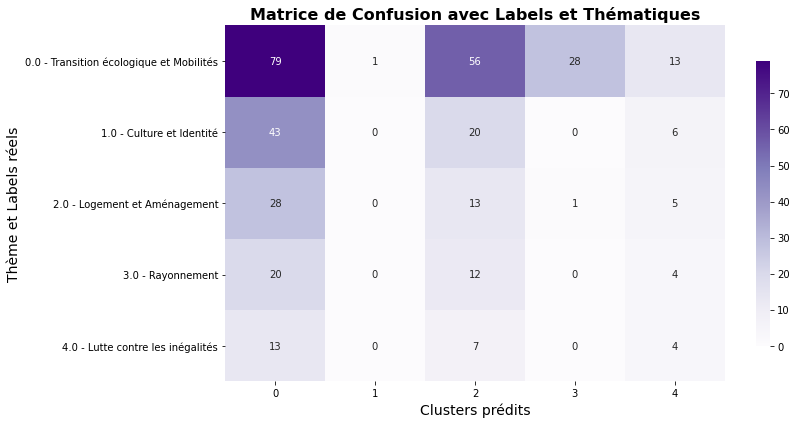

                                    Tf*Idf


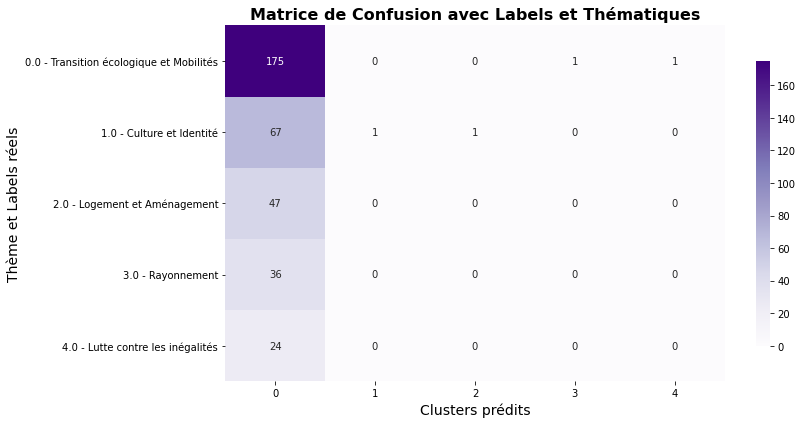

In [49]:
# Appliquer la fonction plot_heatmap aux trois DataFrames

print(" " * 35 + " Word2vec pour document")
plot_heatmap(sentence_word2vec_clusters)

print(" " * 35 + " Tf*Idf")
plot_heatmap(tfidf_clusters)


**On peut constater** un problème majeur avec par exemple `clustering Sentence_word2vec` qui manque de séparation significative entre les clusters.

**1. Diversité et Dominance des Clusters**
- Le Cluster 0 est excessivement diversifié, mélangeant plusieurs thématiques sans distinction claire
- Les Clusters 3 et 4 sont trop spécifiques et dominés par une seule thématique ("Transition écologique et Mobilités")

**2. Faiblesse des Métriques de Performance**
 - Scores de performance très faibles :
   - Homogeneity : 0.04
   - Adjusted Rand Index : -0.03
Ces scores indiquent une très mauvaise qualité de clustering suggérant que les données ne sont pas correctement séparées.

**3. Problème Structural**
 - Le Cluster 1 est presque vide, ce qui révèle des problèmes potentiels dans :
   - La méthode de clustering
   - La définition des paramètres
   - La représentation vectorielle initiale
------------------------

## **Sélection des Mots ou des Documents Représentatifs pour Chaque Cluster**
Lors de l'analyse précédente nous avons constaté que les clusters générés par K-means présentent une forte similarité. De plus quelle que soit la représentation vectorielle utilisée,les propositions d'idées issues des différentes thématiques montrent un chevauchement important.

Pour finaliser le projet et extraire les termes (mots ou phrases) les plus représentatifs après le clustering nous avons adopté deux approches complémentaires :


#### **Pour les mots** : 
Nous avons utilisé Word Embedding avec Word2Vec et combiné deux méthodes pour identifier les termes représentatifs :

- **Cosine Similarity** : Cette méthode mesure la proximité des mots avec le centroïde de chaque cluster garantissant qu'ils représentent bien le thème principal. Cependant, lorsque les clusters sont très similaires certains mots peuvent se chevaucher entre plusieurs clusters.
- **TF-IDF** : Cette technique pondère les mots en fonction de leur fréquence dans un cluster et de leur rareté dans l'ensemble des données. Cela permet de gérer les termes redondants mais n'intègre pas directement leur proximité avec le centroïde.
- **Combinaison des deux** : En combinant TF-IDF et Cosine Similarity nous maximisons la séparation entre les clusters. Cette approche permet de sélectionner des termes spécifiques et alignés avec le centroïde tout en réduisant l


 
#### **documents Représentatifs + extraction de termes pertiant** : 
Pour identifier les documents les plus représentatifs de chaque cluster et en extraire les informations clés nous avons utilisé un sentence embedding avec USE (Universal Sentence Encoder) :

- **Identification des Documents Représentatifs** :
   - **distance cosinus** pour mesurer la similarité entre chaque document et le centroïde du cluster et retenir les 5 plus proche.

- **Extraction des Mots-Clés et Résumé Automatique** :
  - **Extraction des mots-clés** : Pour extraire les mots clés nous avons utilisé la `bibliothèque RAKE (Rapid Automatic Keyword Extraction)`.
  - **Résumé automatique** : Pour produire un résumé de deux lignes par document nous avons employé la `bibliothèque Sumy en s'appuyant sur l'algorithme de résumé LSA (Latent Semantic Analysis)`.


**Fonction qui évalue la similarité cosinus entre les vecteurs d'embedding des mots/docs et les centroïdes des clusters**

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(clustering_df, model_fit, embedding_col, prediction_col):

    # Convertir le DataFrame PySpark en Pandas DataFrame
    clustering_df = clustering_df.toPandas()

    # Extraire les centroïdes à partir du modèle KMeans
    centroids = model_fit.clusterCenters()

    # Fonction pour calculer la similarité cosinus entre l'embedding du mot et le centroïde du cluster
    def calculate_similarity(row, centroids):
        
        cluster_id = row[prediction_col]  # ID du cluster auquel appartient le mot
        word_vector = np.array(row[embedding_col]).reshape(1, -1)  # Embedding du mot
        centroid = centroids[cluster_id].reshape(1, -1)  # Centroïde du cluster
        return cosine_similarity(word_vector, centroid)[0][0]

    # Appliquer la fonction de similarité sur chaque ligne du DataFrame
    clustering_df['similarity'] = clustering_df.apply(
        lambda row: calculate_similarity(row, centroids), axis=1
    )

    return clustering_df

## **Pour les Mots**

In [51]:
# On reprend le kmeans avec word2vec_words
    
KMeans= KMeans(featuresCol="embedding", k=5, seed=1234)

# Entrainement du modèle
model= KMeans.fit(word2vec_words)
KMeans_word2vec= model.transform(word2vec_words)

In [52]:
# Application de la fonction pour calcul de simalrité
KMeans_word2vec_mots = calculate_cosine_similarity(clustering_df= KMeans_word2vec,
                                                    model_fit= model,
                                                    embedding_col='embedding', 
                                                    prediction_col='prediction')

# Afficher les colonnes du DataFrame avec la nouvelle colonne 'similarity'
print( type(KMeans_word2vec_mots) )
print(KMeans_word2vec_mots.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Identifiant', 'thématique', 'words', 'embedding', 'label',
       'prediction', 'similarity'],
      dtype='object')


**Calcule les scores combinés pour les mots dans chaque cluster en utilisant TF-IDF et la similarité cosinus puis sélectionne les 10 mots les plus pertinents par cluster en fonction de ces scores**

In [53]:

##############################################################################
###################### Application de la combinaison ############################
#################################################################################

#######################################################
### Étape 1 : Compter la fréquence des mots par cluster
#######################################################
word_counts_per_cluster = KMeans_word2vec_mots.groupby(['prediction', 'words']).size().reset_index(name='count')

######################################################
# Étape 2 : Joindre la similarité avec les fréquences
######################################################
word_counts_per_cluster = word_counts_per_cluster.merge(
    KMeans_word2vec_mots[['words', 'prediction', 'similarity']],
    on=['words', 'prediction'],
    how='left'
)

####################################################
# Étape 3 : Calcul de la fréquence des documents (DF)
####################################################

# Calculer le nombre total de clusters
total_clusters = word_counts_per_cluster['prediction'].nunique()

# Calculer le DF (Document Frequency) pour chaque terme
df = word_counts_per_cluster.groupby('words')['prediction'].nunique().reset_index(name='df')

#######################################################
# Étape 4: Calcul de l'IDF (Inverse Document Frequency)
########################################################

# Joindre le DF avec les fréquences
word_counts_per_cluster = word_counts_per_cluster.merge(df, on='words', how='left')

# Calculer l'IDF pour chaque terme
word_counts_per_cluster['idf'] = np.log(total_clusters / word_counts_per_cluster['df'])

###################################
# Étape 5: Calculer le score TF-IDF
###################################

# Calculer le score TF-IDF
word_counts_per_cluster['tfidf'] = word_counts_per_cluster['count'] * word_counts_per_cluster['idf']

#########################################################################
# Étape 6: Calcul du score combiné (TF-IDF * Similarité Cosinus)
#########################################################################

# Calculer un score combiné (produit du score TF-IDF et de la similarité)
word_counts_per_cluster['combined_score'] = word_counts_per_cluster['tfidf'] * word_counts_per_cluster['similarity']

##########################
# Étape 7: Pour affichage
##########################

# Trier les mots pour chaque cluster en fonction du score combiné (le plus élevé en premier)
word_counts_per_cluster_sorted = word_counts_per_cluster.sort_values(by=['prediction', 'combined_score'], ascending=[True, False])

# Supprimer les mots uniques par cluster
top_words_per_cluster_unique = word_counts_per_cluster_sorted.drop_duplicates(subset=['prediction', 'words'])

# Sélectionner les 10 mots les plus pertinents pour chaque cluster en fonction du score combiné
top_words_combined = top_words_per_cluster_unique.groupby('prediction').head(10)

# voir les premier elements tableaux
top_words_combined.head(3)

,prediction,words,count,similarity,df,idf,tfidf,combined_score
13345,0,ville,151,0.605888,1,1.609438,243.025125,147.245921
7764,0,métropole,129,0.497099,1,1.609438,207.617491,103.206436
9198,0,place,110,0.580966,1,1.609438,177.038170,102.853196


In [54]:
# Afficher les résultats de manière simple
for index, group in top_words_combined.groupby('prediction'):
    print(f"Cluster {index}: {group['words'].tolist()}")

Cluster 0: ['ville', 'métropole', 'place', 'espace', 'parisien', 'projet', 'commun', 'petit', 'public', 'exemple']
Cluster 1: ['entre', 'lieu', 'rue', 'métro', 'parc', 'bus', 'gare', 'vers', 'etc', 'vie']
Cluster 2: ['_']
Cluster 3: ['pari', 'grand', 'plus', 'bien', 'seul', 'tel', 'prix', 'hui', 'coût', 'jeu']
Cluster 4: ['pouvoir', 'permettre', 'naître', 'entrer', 'créer', 'falloir', 'afin', 'mettre', 'proposer', 'voir']


## **Pour les docs/phrases**

In [55]:
from pyspark.ml.clustering import KMeans

# On reprend le kmeans avec use_sentences
KMeans= KMeans(featuresCol="embedding", k=5, seed=1234)

# Entrainement du modèle
model_use= KMeans.fit(use_sentences)
KMeans_use= model_use.transform(use_sentences)

**Préparation 1 des données en sélectionnant les 5 documents les plus pertinents pour chaque cluster en fonction de la similarité cosinus.**

In [57]:
# Application de la fonction pour calcul de simalrité
KMeans_use_phrases = calculate_cosine_similarity(clustering_df= KMeans_use,
                                                    model_fit= model_use,
                                                    embedding_col='embedding', 
                                                    prediction_col='prediction')

# Afficher les colonnes du DataFrame avec la nouvelle colonne 'similarity'
print( type(KMeans_use_phrases) )
print(KMeans_use_phrases.columns)
print()


##########################################################
# Trier les mots par cluster et par similarité décroissante
############################################################
KMeans_use_phrases_sorted = KMeans_use_phrases.sort_values(by=['prediction', 'similarity'], ascending=[True, False])

# Extraire les N mots les plus significatifs pour chaque cluster (par exemple, top 3 mots)
N = 5
top_words_per_cluster = KMeans_use_phrases_sorted.groupby('prediction').head(N)

print(top_words_per_cluster.shape)


<class 'pandas.core.frame.DataFrame'>
Index(['Identifiant', 'thématique', 'sentences', 'embedding', 'label',
       'prediction', 'similarity'],
      dtype='object')

(25, 7)


In [58]:
top_words_per_cluster[["sentences", "prediction", "similarity"]].head(2)

,sentences,prediction,similarity
194,"""Mettre des composteurs collectifs dans les jardins publics. Les construire de préférence en bois pour qu'ils soient le moins possible """"remarquable"""". Le compost ça dégage une certaine odeur et dans un espace de jardin l'odeur s'évacue très facilement ce qui n'est pas le cas si l'on met un composteur collectif dans un immeuble. Chacun pourrait venir y déposer ses épluchures. Ce n'est pas très contraignant du fait qu'à Paris il y a beaucoup de jardins. Le coût peut ne pas être exorbitant si l'on utilise, pour construire les composteurs, du bois recyclé. Cela, ferait beaucoup moins d'ordures dans les poubelles d'immeubles et du bon compost réutilisé pour les plantations des jardins.""",0,0.716613
114,"Comme cela se fait déjà, nous trions nos poubelles selon que les déchets soient recyclables, non recyclables ou soient en verre. Il est nécessaire à ce qu'une poubelle de compost soit présente dans tous les immeubles d'île de France et qu'un ramassage à l'échelle du territoire se fasse. Collecté puis mis en sac il pourra ensuite être revendu à bas prix aux agriculteurs qui utiliseront cet engrais naturel voire en petite quantités aux franciliens qui pratiquent l'agriculture urbaine. La ville de San Francisco pratique déjà ce type de tri et ils observent que l'utilisation de ce compost dans les champs de la région est totalement bénéfique. La pousse est meilleure et les sols piègent mieux les polluants tels que le CO2. Pour que le résultat fonctionne, les nouvelles poubelles devront être accompagnées d'un fascicule pour chaque foyer leur expliquant précisément quels sont les détritus (en fonction des familles de fruits et de légumes) que l'on peut y mettre. La gestion des déchets doit être vue aujourd'hui à l'échelle du territoire et non plus simplement du quartier. Afin que la démarche soit suivie par un maximum de personne un système de bonus est aussi à organiser. Au lieu d'inciter par la punition il serait bon d'inciter par la récompense. Chaque logement payant une taxe d'ordure ménagère au poids, il serait intéressant par exemple que pour chaque tranche de 10 kg de compost produit, diminuer la taxe du logement de 1 à 2%. Les personnes n'effectuant pas le tri ne seraient pas surtaxé mais celles qui le font seraient récompensées. L'impact de nos déchets doit diminuer et doit s'inscrire dans un cercle vertueux afin de répondre aux défis écologiques qui nous attendent.",0,0.697751


**Préparation 2 des données en regroupant et concaténant les documents par cluster avant d'utiliser les techniques comme rank et summarization pour extraire les informations clés.**

In [59]:
# Regrouper les documents nettoyés 
grouped_sentences = top_words_per_cluster.groupby('prediction')['sentences'].apply(list).reset_index()

# Concaténer les sentences de chaque cluster en une seule chaîne de caractères
grouped_sentences['concatenated_sentences'] = grouped_sentences['sentences'].apply(lambda x: ' '.join(x))

# Afficher les résultats intermédiaires

grouped_sentences[['prediction', 'concatenated_sentences']].head(1)

prediction  \
0           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [60]:
print(grouped_sentences.shape)
print(grouped_sentences.columns)

(5, 3)
Index(['prediction', 'sentences', 'concatenated_sentences'], dtype='object')


#### **utilisation Rake**

In [63]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
import re
from rake_nltk import Rake

# Initialisation de RAKE avec les paramètres
r = Rake(
    language='french',                     # Langue du texte
    stopwords=comb_list_unique,            # Liste personnalisée de mots d'arrêt
    min_length=2,                          # Longueur minimale des séquences de mots
    max_length=5,                          # Longueur maximale des séquences de mots
    ranking_metric='degree_to_frequency_ratio'  # Métrique de classement
)

# Fonction pour nettoyer le texte (supprimer la ponctuation et autres caractères indésirables)
def clean_text(text):
    # Remplacer la ponctuation et les caractères spéciaux par des espaces
    text = re.sub(r'[^\w\s]', '', text)  # Supprime la ponctuation
    text = re.sub(r'\s+', ' ', text)  # Remplace les multiples espaces par un seul
    text = text.strip()  # Supprime les espaces au début et à la fin
    return text

# Fonction pour extraire les mots-clés
def extract_keywords(text):
    # Nettoyer le texte avant d'appliquer RAKE
    cleaned_text = clean_text(text)
    r.extract_keywords_from_text(cleaned_text)
    return r.get_ranked_phrases()[:10]  # Retourne les 10 mots-clés les plus importants


# Appliquer RAKE à chaque cluster (en utilisant les phrases concaténées)
grouped_sentences['keywords'] = grouped_sentences['concatenated_sentences'].apply(extract_keywords)


# Afficher les mots-clés par cluster
for index, row in grouped_sentences.iterrows():
    print(f"Cluster {row['prediction']}: {row['keywords']}")
    print()


Cluster 0: ['jeunes générations dont dépend lavenir', 'bouteilles papiers plastiques mégots cannettes', 'metier beaucoup dimmeubles parisiens nont', 'long terme dune telle opération', 'immeuble chacun pourrait venir', 'fasse collecté puis mis', 'risque bien plus élevé', 'citoyens pourraient sy associer', 'san francisco pratique déjà', 'réellement débarrasser différents milieux']

Cluster 1: ['profiter despaces conviviaux situés près', 'zénith différents théatres dont celui', 'équipements sportifs innovants skate parkour', 'véritables patchworks darchitectures colorées enfin', 'initiative fera lobjet dune restitution', 'élus lors dun atelier participatif', 'dernier budget participatif plusieurs bâtiments', 'paris nb bibliothèque numérique enceinte', 'incubateurs sy trouvant vers', 'culture potagère daménagement écologique']

Cluster 2: ['accéder leau facilement amener', 'trouve quau niveau', 'souffrent cest affreux', 'poche jusquà trouver', 'mauvais élèves pourront', 'amandes jai limpre

**On constate** que l'augmentation des paramètres `min_length` et `max_length` a amélioré la cohérence des résultats d'extraction des mots-clés. Initialement, les clusters étaient très proches, ce qui entraînait de nombreux chevauchements et une extraction floue.

**Pourquoi augmenter ces paramètres ?**

1. **Meilleure capture du contexte :** En augmentant `min_length` et `max_length`, RAKE capte des séquences plus longues, comme des trigrammes ou des expressions de 4 mots qui offrent un contexte plus riche et pertinent que des unigrammes ou bigrammes isolés.

2. **Réduction du bruit :** Les séquences plus longues par exemple des groupes de 3 à 5 mots, sont moins susceptibles d'être ambiguës que des mots simples ou des bigrammes réduisant ainsi les termes génériques et augmentant la précision de l'extraction.

3. **Mots-clés plus contextuels :** Avec des séquences étendues, RAKE identifie des relations plus spécifiques entre les concepts  permettant d'extraire des termes mieux adaptés aux thématiques des clusters comme des expressions techniques ou des termes spécifiques au domaine.


### **Résumé de texte avec sumy**


https://miso-belica.github.io/sumy/

In [65]:
# Importations pour Sumy
from sumy.parsers.plaintext import PlaintextParser  # Pour analyser le texte brut
from sumy.nlp.tokenizers import Tokenizer  # Pour le tokeniseur de phrases
from sumy.summarizers.lsa import LsaSummarizer  # Algorithme de résumé LSA
from sumy.nlp.stemmers import Stemmer  # Pour le stemming des mots
from sumy.utils import get_stop_words  # Récupérer les stopwords pour une langue donnée



# Fonction pour résumer le texte avec Sumy
def summarize_text(text, n_sentences=2):
    # Initialiser le parser
    parser = PlaintextParser.from_string(text, Tokenizer("french"))

    # Initialiser le stemmer
    stemmer = Stemmer("french")

    # Initialiser le résumé
    summarizer = LsaSummarizer(stemmer)
    summarizer.stop_words = get_stop_words("french")

    # Résumer le texte
    summary = summarizer(parser.document, n_sentences)  # n_sentences phrases dans le résumé

    # Joindre les phrases pour former le résumé
    summary_text = ' '.join(str(sentence) for sentence in summary)
    return summary_text


# Appliquer la fonction de résumé à chaque document concaténé
grouped_sentences['summary'] = grouped_sentences['concatenated_sentences'].apply(summarize_text)


# Afficher les résultats de manière claire
for index, row in grouped_sentences.iterrows():
    print(f"Cluster {row['prediction']}:")  # Affiche le numéro du cluster
    print(f"Résumé: {row['summary']}")      # Affiche le résumé
    print("\n")                             # Ajoute deux lignes vides pour séparer les clusters



Cluster 0:
Résumé: "Beaucoup d'immeubles parisiens n'ont pas la place d'avoir deux poubelles (une pour les déchets ménagers quotidiens et celles pour les cartons et emballages plastiques) ou les rues ne sont pas toujours comprises dans les réseau de camion du tri sélectif. S'il nous semble important que ce projet soit d'abord instauré dans les écoles et universités, il est évident que les entreprises et citoyens pourraient s'y associer et organiser des ramassages.


Cluster 1:
Résumé: Si certaines cités sont de vraies réussites architecturales et sociales, d'autres sont considérées comme ""ratées"" ou n'ayant pas apporté les objectifs escomptés. Par exemple, on peut certes trouver architecturalement discutable la Palais d'Abraxas de Ricardo Bofill à Noisy le Grand, il n'empêche que ce bâtiment ne laisse pas indifférent et qu'il a, d'ores et déjà, une histoire passionnante.


Cluster 2:
Résumé: J'ai l'impression que les manades sont totalement facultatives alors qui devrait servir éduqu

## FIN